# **EDA**

In [ ]:
# załadowanie potrzebnych pakietów
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # połączenie z dyskiem Google, gdzie są przechowywane dane
features = pd.read_excel('/content/drive/MyDrive/classification/wszystkie.xlsx') # załadowanie ramki danych 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features.head() # wyświetlenie 5 pierwszych kolumn

,Column1,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,...,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0,v3.0.1,1.19.5,2.0.2,2001-01-01,2010-07-03,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},54c9dc07aa22138779013c7598aaeba3aee5793a,3D,"(0.5, 0.5999987721443176, 0.5)","(512, 400, 512)",92.847988,0.0,2882.0,10d7770b21d9f35714c1756e5f876d2ce236d3fa,"(0.5, 0.5999987721443176, 0.5)","(512, 400, 512)","(123, 45, 136, 275, 288, 293)",10232109,1,"(263.936497549039, 182.3952340617169, 286.0189...","(6.874247004499978, -19.050418984446964, 15.24...",0.805016,0.757467,116.534988,153.848171,145.784087,172.054321,173.294911,175.772283,1.534763e+06,123.850207,0.678700,94805.567451,0.061772,1.534813e+06,383.0,1378.0,1.069701e+13,...,0.155156,245.412098,0.001263,175223.484996,0.020625,234.474693,1724.865988,1.813694,3037.096661,0.033465,0.015188,6.616171,6.311502e+06,0.741640,0.830172,0.354778,0.884083,1528.633825,0.013256,26816.851603,0.017089,274.033428,1511.584556,244025.950989,3.068996e+08,2636.004716,0.006741,556492.122791,0.354623,0.617079,904.193603,0.003407,8.365022,0.153365,243983.435503,36.796968,0.000005,8377.322232,0.040418,0.032840
1,0,v3.0.1,1.19.5,2.0.2,2001-01-01,2010-07-03,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},aa9ca29ac7a7015047c0b68b854b90c3b6

In [ ]:
features.columns[:10] # kolumny które nie są istotne dla klasyfikacji 

Index(['Column1', 'diagnostics_Versions_PyRadiomics',
       'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
       'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
       'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash',
       'diagnostics_Image-original_Dimensionality'],
      dtype='object')

In [ ]:
# usunięcie kolumn nieistotnych dla klasyfikacji 
features.drop(columns=features.columns[:10], axis=1, inplace=True)
features.drop(columns = ['diagnostics_Mask-original_Hash'], axis=1, inplace=True)
features.head()

,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,...,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,"(0.5, 0.5999987721443176, 0.5)","(512, 400, 512)",92.847988,0.0,2882.0,"(0.5, 0.5999987721443176, 0.5)","(512, 400, 512)","(123, 45, 136, 275, 288, 293)",10232109,1,"(263.936497549039, 182.3952340617169, 286.0189...","(6.874247004499978, -19.050418984446964, 15.24...",0.805016,0.757467,116.534988,153.848171,145.784087,172.054321,173.294911,175.772283,1.534763e+06,123.850207,0.678700,94805.567451,0.061772,1.534813e+06,383.0,1378.0,1.069701e+13,5.818452,428.0,3.488820,2882.0,286.415228,951.496630,981.0,1.0,2881.0,187.586281,1022.465527,...,0.155156,245.412098,0.001263,175223.484996,0.020625,234.474693,1724.865988,1.813694,3037.096661,0.033465,0.015188,6.616171,6.311502e+06,0.741640,0.830172,0.354778,0.884083,1528.633825,0.013256,26816.851603,0.017089,274.033428,1511.584556,244025.950989,3.068996e+08,2636.004716,0.006741,556492.122791,0.354623,0.617079,904.193603,0.003407,8.365022,0.153365,243983.435503,36.796968,0.000005,8377.322232,0.040418,0.032840
1,"(2.0, 0.5, 0.5)","(129, 512, 512)",70.845480,0.0,2520.0,"(2.0, 0.5, 0.5)","(129, 512, 512)","(32, 63, 155, 67, 352, 268)",2896001,1,"(65.84319929447538, 228.99130490631737, 292.76...","(3.1425991793839785, -16.852676028442204, 4.57...",0

In [ ]:
features.columns[0:30] # wyświetlenie kolumn, które pozostały

Index(['diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum',
       'diagnostics_Image-original_Maximum',
       'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_VoxelNum',
       'diagnostics_Mask-original_VolumeNum',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_CenterOfMass', 'original_shape_Elongation',
       'original_shape_Flatness', 'original_shape_LeastAxisLength',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/classification/train_labels_after_mod.csv') # załadowanie pliku ze statusem metylacji MGMT dla każdego pacjenta 
labels = labels.drop(columns='BraTS21ID', axis=1) # usunięcie pierwszej kolumny z ID pacjenta 
labels['MGMT_value'] = labels['MGMT_value'].fillna(0) # wczytuje wartość 0 jako NaN, więc zamieniamy wszystkie NaN na 0 
labels # wyświetlenie ramki danych 

,MGMT_value
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
571,1.0
572,1.0
573,1.0
574,0.0


In [ ]:
labels.dtypes # sprawdzenie typu kolumny MGMT_Value

MGMT_value    float64
dtype: object

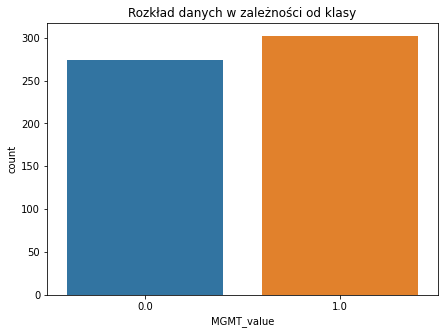

In [ ]:
# wyświetlenie liczby pacjentów w zależności od klasy (0- niemetylowany, 1 - metylowany)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5))
plt.title("Rozkład danych w zależności od klasy")
plt.xlabel("status metylacji promotora MGMT")
sns.countplot(data=labels, x="MGMT_value")

In [ ]:
# wyświetlenie danych, które mają kolumny typu object 
objects_columns = features.select_dtypes(include=['object'])
objects_columns.head(5) 

,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass
0,"(0.5, 0.5999987721443176, 0.5)","(512, 400, 512)","(0.5, 0.5999987721443176, 0.5)","(512, 400, 512)","(123, 45, 136, 275, 288, 293)","(263.936497549039, 182.3952340617169, 286.0189...","(6.874247004499978, -19.050418984446964, 15.24..."
1,"(2.0, 0.5, 0.5)","(129, 512, 512)","(2.0, 0.5, 0.5)","(129, 512, 512)","(32, 63, 155, 67, 352, 268)","(65.84319929447538, 228.99130490631737, 292.76...","(3.1425991793839785, -16.852676028442204, 4.57..."
2,"(2.0, 0.5, 0.5)","(129, 512, 512)","(2.0, 0.5, 0.5)","(129, 512, 512)","(29, 71, 166, 71, 357, 283)","(64.07171501341449, 241.29554973798577, 324.14...","(-4.4088009412115525, -26.760851093068027, 14...."
3,"(0.5000000596046448, 0.6000010371208191, 0.499...","(512, 400, 512)","(0.5000000596046448, 0.6000010371208191, 0.499...","(512, 400, 512)","(129, 55, 153, 271, 277, 271)","(261.7584564961003, 181.7757552348569, 292.780...","(2.8612714780280157, -10.091192437311093, -0.8..."
4,"(0.5, 0.5, 2.0)","(512, 512, 129)","(0.5, 0.5, 2.0)","(512, 512, 129)","(117, 58, 37, 271, 358, 68)","(250.6375725191665, 223.3316043511341, 70.2493...","(-3.6064250592709755, -19.083499703304497, 9.2..."


In [ ]:
# przeksztalcenie kolumn z typem object gdzie są krotki na osobne kolumny typu float

for i in objects_columns:

  # 3 wartości z jednej kolumny do 3 roznych kolumn po 1 wartosci 
  # jezeli to boundingBox to do 6 roznych kolumn poniewaz ma wiecej wartosci

  if i == 'diagnostics_Mask-original_BoundingBox':

    features[[f'{i}'+'1', f'{i}'+'2', f'{i}'+'3',f'{i}'+'4', f'{i}'+'5', f'{i}'+'6']] = pd.DataFrame(features[f'{i}'].str.split(", ").tolist(), index=features.index)

    features[f'{i}'+'6'] = features[f'{i}'+'3'].str.replace(r')','') # pozbycie się nawiasów w tych kolumnach
    features[f'{i}'+'1'] = features[f'{i}'+'1'].str.replace(r'(','') # pozbycie się nawiasów w tych kolumnach

    features[f'{i}'+'1'] = features[f'{i}'+'1'].astype(float)
    features[f'{i}'+'2'] = features[f'{i}'+'2'].astype(float)
    features[f'{i}'+'3'] = features[f'{i}'+'3'].astype(float)
    features[f'{i}'+'4'] = features[f'{i}'+'4'].astype(float)
    features[f'{i}'+'5'] = features[f'{i}'+'5'].astype(float)
    features[f'{i}'+'6'] = features[f'{i}'+'6'].astype(float)

  else:

    features[[f'{i}'+'1', f'{i}'+'2', f'{i}'+'3']] = pd.DataFrame(features[f'{i}'].str.split(", ").tolist(), index=features.index)

    features[f'{i}'+'3'] = features[f'{i}'+'3'].str.replace(r')','') # pozbycie sie nawiasów w tych kolumnach 
    features[f'{i}'+'1'] = features[f'{i}'+'1'].str.replace(r'(','') # pozbycie sie nawiasów w tych kolumnach 

    features[f'{i}'+'1'] = features[f'{i}'+'1'].astype(float)
    features[f'{i}'+'2'] = features[f'{i}'+'2'].astype(float)
    features[f'{i}'+'3'] = features[f'{i}'+'3'].astype(float)

In [ ]:
# wyrzucenie z ramki danych tych które są typu object 
df = features.select_dtypes(exclude=['object'])
df.head()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,...,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,diagnostics_Image-original_Spacing1,diagnostics_Image-original_Spacing2,diagnostics_Image-original_Spacing3,diagnostics_Image-original_Size1,diagnostics_Image-original_Size2,diagnostics_Image-original_Size3,diagnostics_Mask-original_Spacing1,diagnostics_Mask-original_Spacing2,diagnostics_Mask-original_Spacing3,diagnostics_Mask-original_Size1,diagnostics_Mask-original_Size2,diagnostics_Mask-original_Size3,diagnostics_Mask-original_BoundingBox1,diagnostics_Mask-original_BoundingBox2,diagnostics_Mask-original_BoundingBox3,diagnostics_Mask-original_BoundingBox4,diagnostics_Mask-original_BoundingBox5,diagnostics_Mask-original_BoundingBox6,diagnostics_Mask-original_CenterOfMassIndex1,diagnostics_Mask-original_CenterOfMassIndex2,diagnostics_Mask-original_CenterOfMassIndex3,diagnostics_Mask-original_CenterOfMass1,diagnostics_Mask-original_CenterOfMass2,diagnostics_Mask-original_CenterOfMass3
0,92.847988,0.0,2882.0,10232109,1,0.805016,0.757467,116.534988,153.848171,145.784087,172.054321,173.294911,175.772283,1.534763e+06,123.850207,0.678700,94805.567451,0.061772,1.534813e+06,383.0,1378.0,1.069701e+13,5.818452,428.0,3.488820,2882.0,286.415228,951.496630,981.0,1.0,2881.0,187.586281,1022.465527,-0.417034,1.604549e+12,0.021309,140089.916443,1720.135559,2.438421e+06,-8724.441101,...,3.068996e+08,2636.004716,0.006741,556492.122791,0.354623,0.617079,904.193603,0.003407,8.365022,0.153365,243983.435503,36.796968,0.000005,8377.322232,0.040418,0.032840,0.5,0.599999,0.5,512.0,400.0,512.0,0.5,0.599999,0.5,512.0,400.0,512.0,123.0,45.0,136.0,275.0,288.0,136.0,263.936498,182.395234,286.018995,6.874247,-19.050419,15.249495
1,70.845480,0.0,2520.0,2896001,1,0.779414,0.694698,108.840944,156.673803,140.982268,176.500708,179.053763,179.087967,1.447747e+06,122.113776,0.634966,97467.968744,0.067324,1.448000e+06,329.0,1183.0,2.332743e+12,5.699835,357.0,4.383271,2520.0,255.080411,827.261991,850.0,1.0,2519.0,158.326815,897.499201,0.186768,1.166371e+12,0.024667,121142.412842,1331.163665,2.267495e+06,6703.163269,...,7.273821e+07,62.197292,0.018094,190808.094124,0.393395,0.651718,627.510113,0.010359,8.000032,0.167482,59390.826909,30.448392,0.000008,11803.635804,0.084227,0.042790,2.0,0.5

In [ ]:
# dołączenie kolumny ze statusem metylacji promotora MGMT do naszej ramki danych z wyekstrahowanymi cechami 
df = pd.concat([df, labels], axis=1)
df.head()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,...,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,diagnostics_Image-original_Spacing1,diagnostics_Image-original_Spacing2,diagnostics_Image-original_Spacing3,diagnostics_Image-original_Size1,diagnostics_Image-original_Size2,diagnostics_Image-original_Size3,diagnostics_Mask-original_Spacing1,diagnostics_Mask-original_Spacing2,diagnostics_Mask-original_Spacing3,diagnostics_Mask-original_Size1,diagnostics_Mask-original_Size2,diagnostics_Mask-original_Size3,diagnostics_Mask-original_BoundingBox1,diagnostics_Mask-original_BoundingBox2,diagnostics_Mask-original_BoundingBox3,diagnostics_Mask-original_BoundingBox4,diagnostics_Mask-original_BoundingBox5,diagnostics_Mask-original_BoundingBox6,diagnostics_Mask-original_CenterOfMassIndex1,diagnostics_Mask-original_CenterOfMassIndex2,diagnostics_Mask-original_CenterOfMassIndex3,diagnostics_Mask-original_CenterOfMass1,diagnostics_Mask-original_CenterOfMass2,diagnostics_Mask-original_CenterOfMass3,MGMT_value
0,92.847988,0.0,2882.0,10232109,1,0.805016,0.757467,116.534988,153.848171,145.784087,172.054321,173.294911,175.772283,1.534763e+06,123.850207,0.678700,94805.567451,0.061772,1.534813e+06,383.0,1378.0,1.069701e+13,5.818452,428.0,3.488820,2882.0,286.415228,951.496630,981.0,1.0,2881.0,187.586281,1022.465527,-0.417034,1.604549e+12,0.021309,140089.916443,1720.135559,2.438421e+06,-8724.441101,...,2636.004716,0.006741,556492.122791,0.354623,0.617079,904.193603,0.003407,8.365022,0.153365,243983.435503,36.796968,0.000005,8377.322232,0.040418,0.032840,0.5,0.599999,0.5,512.0,400.0,512.0,0.5,0.599999,0.5,512.0,400.0,512.0,123.0,45.0,136.0,275.0,288.0,136.0,263.936498,182.395234,286.018995,6.874247,-19.050419,15.249495,1.0
1,70.845480,0.0,2520.0,2896001,1,0.779414,0.694698,108.840944,156.673803,140.982268,176.500708,179.053763,179.087967,1.447747e+06,122.113776,0.634966,97467.968744,0.067324,1.448000e+06,329.0,1183.0,2.332743e+12,5.699835,357.0,4.383271,2520.0,255.080411,827.261991,850.0,1.0,2519.0,158.326815,897.499201,0.186768,1.166371e+12,0.024667,121142.412842,1331.163665,2.267495e+06,6703.163269,...,62.197292,0.018094,190808.094124,0.393395,0.651718,627.510113,0.010359,8.000032,0.167482,59390.826909,30.448392,0.000008,11803.635804,0.084227,0.042790,2.0,0.500000,0.5,129.0,512.0,512.0,2.0,0.500000,0.5,129.0,512.0,

In [ ]:
# sprawdzenie czy istnieją  w ramce jakieś braki danych 
df.isnull().sum().any()

False

In [ ]:
# obliczenie najważniejszych funkcji statystycznych, aby mniej więcej zorientować się jakie są wielkości naszych danych 
df.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,...,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,diagnostics_Image-original_Spacing1,diagnostics_Image-original_Spacing2,diagnostics_Image-original_Spacing3,diagnostics_Image-original_Size1,diagnostics_Image-original_Size2,diagnostics_Image-original_Size3,diagnostics_Mask-original_Spacing1,diagnostics_Mask-original_Spacing2,diagnostics_Mask-original_Spacing3,diagnostics_Mask-original_Size1,diagnostics_Mask-original_Size2,diagnostics_Mask-original_Size3,diagnostics_Mask-original_BoundingBox1,diagnostics_Mask-original_BoundingBox2,diagnostics_Mask-original_BoundingBox3,diagnostics_Mask-original_BoundingBox4,diagnostics_Mask-original_BoundingBox5,diagnostics_Mask-original_BoundingBox6,diagnostics_Mask-original_CenterOfMassIndex1,diagnostics_Mask-original_CenterOfMassIndex2,diagnostics_Mask-original_CenterOfMassIndex3,diagnostics_Mask-original_CenterOfMass1,diagnostics_Mask-original_CenterOfMass2,diagnostics_Mask-original_CenterOfMass3,MGMT_value
count,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.0,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,5.760000e+02,576.000000,...,5.760000e+02,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,73.074528,-0.031250,1871.092014,3.118201e+06,1.364583,0.799583,0.710160,112.231144,158.205738,149.555954,176.794674,173.039011,180.466335,1.559941e+06,126.292598,0.685052,95137.488346,0.061207,1.560445e+06,258.939583,865.447917,3.387914e+12,4.603443,254.217014,5.666959,1871.092014,180.795770,596.601026,609.621528,1.0,1870.092014,112.154980,645.838631,0.221738,1.007612e+12,0.082860,93295.607485,1040.956895,2.87590

In [ ]:
# mediana wszystkich danych w zależności od klasy 
pd.pivot_table(df.iloc[:, :-1], index = df.iloc[:, -1], aggfunc=['median'])

median  ...                           
           diagnostics_Image-original_Maximum  ... original_shape_VoxelVolume
MGMT_value                                     ...                           
0.0                                    1080.0  ...               1.553207e+06
1.0                                    2003.0  ...               1.561684e+06

[2 rows x 136 columns]

---

# **SCORES**

---



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
from keras.models import Sequential
from keras.layers import Dense

# funkcja zwracająca wartości metryk jakości klasyfikatora na podstawie zbioru testowego: F1, precyzja, czułość i MCC

def score(model, X_test, y_test):

  y_pred = model.predict(X_test) # predykcja statusu metylacji promotora MGMT na podstawie zbioru testowego 

  # zwraca wartości metryk 
  return f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), matthews_corrcoef(y_test, y_pred)

---

# **gridsearchCV on models**

---






In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# LOGISTIC REGRESSION
def Log_Reg(X_train, y_train):

  model = LogisticRegression(random_state=1) # model

  # parametry do przeszukiwania 
  solvers = ['newton-cg', 'lbfgs', 'liblinear']
  c_values = [100, 50,10, 5, 1.0,0.5, 0.1,0.05, 0.01]
  max_iter = [500]

  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # określenie walidacji krzyżowej (5 podziałów z tasowaniem)

  grid = dict(solver=solvers,C=c_values, max_iter = max_iter) # utworzenie słownika z parametrami do wyszukania najlepszych
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring = 'accuracy' ,error_score=0, refit=True) # generowanie wszystkich możliwych kombinacji parametrów
  grid_result = grid_search.fit(X_train, y_train) # wyszukanie najlepszych parametrów modelu dla danych treningowych
  return grid_result.best_estimator_, grid_result.best_params_ # zwraca dopasowany model z parametrami i wyszukane parametry

  ##### dla modeli niżej działa to analogicznie

# SVM.SVC
def SVM(X_train, y_train):

  model = SVC(random_state=1)
  kernel = ['poly', 'rbf', 'sigmoid']
  C = [1.0, 0.1, 0.05, 0.01]
  gamma = ['scale', 1, 0.1, 0.01, 0.001]

  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  grid = dict(kernel=kernel,C=C,gamma=gamma)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,scoring='accuracy',error_score=0, refit=True)
  grid_result = grid_search.fit(X_train, y_train)
  return grid_result.best_estimator_, grid_result.best_params_

# RANDOM FOREST
def Ran_For(X_train, y_train):

  model = RandomForestClassifier(random_state=1)
  n_estimators = [5,10,14,18,22,26,30,100]
  max_features = ['auto', 'sqrt', 5,10,15]
  max_depth = [2,3,5,7,10]
  bootstrap = [True, False]

  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  grid = dict(n_estimators=n_estimators,max_depth=max_depth,bootstrap=bootstrap, max_features=max_features)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,  cv=cv, scoring='accuracy',error_score=0, refit=True)
  grid_result = grid_search.fit(X_train, y_train)
  return grid_result.best_estimator_, grid_result.best_params_

# KNN
def KNN(X_train, y_train):

  model = KNeighborsClassifier()
  n_neighbors = range(1, 30, 1)
  weights = ['uniform', 'distance']
  metric = ['euclidean', 'manhattan', 'minkowski']

  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, refit=True)
  grid_result = grid_search.fit(X_train, y_train)
  return grid_result.best_estimator_, grid_result.best_params_

# XGBoost
def XGB(X_train, y_train):

  model = XGBClassifier(random_state=1)
  max_depth = [3, 5, 10, 15]
  learning_rate = [0.01, 0.1]
  subsample = [0.5, 1.0]
  colsample_bytree = [0.5, 1.0]
  colsample_bylevel = [0.5, 1.0]
  n_estimators = [5,10,20,50]

  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample, colsample_bytree=colsample_bytree, colsample_bylevel=colsample_bylevel)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, refit=True)
  grid_result = grid_search.fit(X_train, y_train)
  return grid_result.best_estimator_, grid_result.best_params_

---

# **Autoenkoder i klasyczne modele**

---







/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


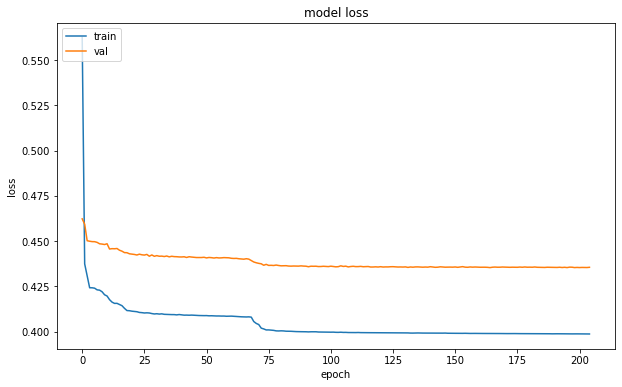

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


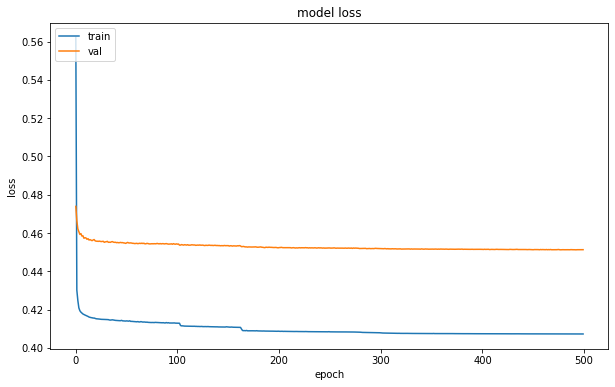

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


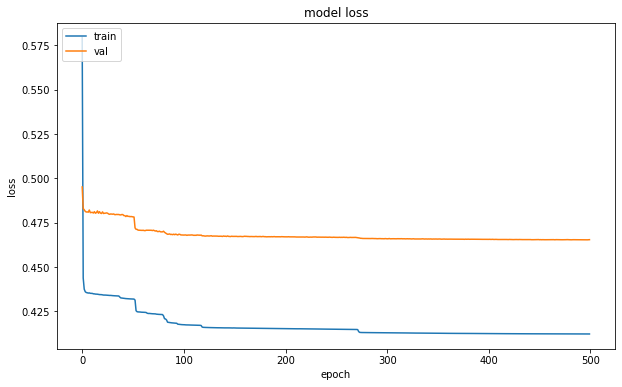

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


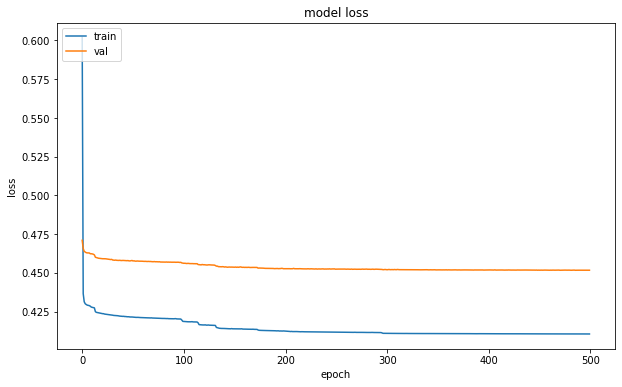

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


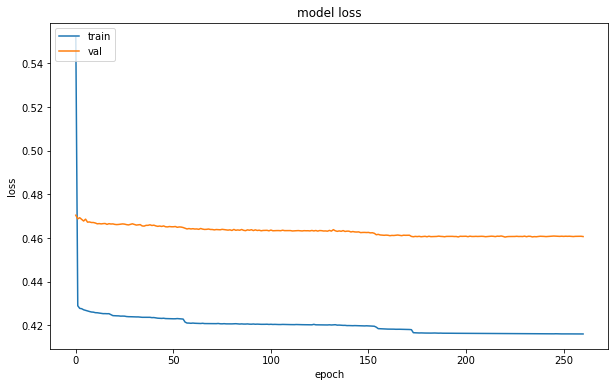

,0,1,2,3,4
Log_Res_f1,0.666667,0.491803,0.543860,0.656000,0.603448
Log_Res_precision,0.646154,0.491803,0.574074,0.630769,0.625000
Log_Res_recall,0.688525,0.491803,0.516667,0.683333,0.583333
Log_Res_MCC,0.271969,-0.082271,0.098575,0.248862,0.201393
SVM_f1,0.633333,0.548673,0.539130,0.548673,0.581818
SVM_precision,0.644068,0.596154,0.563636,0.584906,0.640000
SVM_recall,0.622951,0.508197,0.516667,0.516667,0.533333
SVM_MCC,0.240846,0.119635,0.080303,0.116915,0.207640
Ran_For_f1,0.606557,0.589147,0.537815,0.630769,0.545455
Ran_For_precision,0.606557,0.558824,0.542373,0.585714,0.600000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import keras.models
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

# stworzenie pustych list do wynikow
scores_l_mod = []
scores_SVM_mod = []
scores_r_mod = []
scores_KNN_mod = []
scores_XGB_mod = []

scores_l_mod_params = []
scores_SVM_mod_params = []
scores_r_mod_params = []
scores_KNN_mod_params = []
scores_XGB_mod_params = []

# dane
X = df.iloc[:, :-1].values # wyekstrahowane cechy
y = df.iloc[:, -1].values # etykiety pacjentow (1 - metylowany, 0 - niemetylowany)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # stratyfikowana walidacja krzyżowa (z zachowaniem stałego stosunku między klasami)

for train_i, test_i in kfold.split(X, y): # dla każdego podziału 

  # stwórz zbiory treningowe i testowe
  train_X = X[train_i]
  test_X = X[test_i]
  train_y = y[train_i]
  test_y = y[test_i]

  # wyskalowanie danych do zakresu [-1,1]
  scaler = MinMaxScaler(feature_range=(-1,1))

  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  # implementacja autoenkodera
  encoder = keras.models.Sequential([
    keras.layers.Dense(50, input_shape=[136], activation='relu'),
    keras.layers.Dense(30, activation='selu'),
    keras.layers.Dense(21, activation='selu'),
    ])

  decoder = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=[21], activation='selu'),
    keras.layers.Dense(50, activation='selu'),
    keras.layers.Dense(136, activation='relu'),
  ])

  autoencoder = keras.models.Sequential([encoder, decoder]) # autoenkoder to polaczenie enkodera z dekoderem 
  opt = tf.keras.optimizers.SGD(lr=1, decay=1e-4) # optymalizator
  autoencoder.compile(loss='mse', optimizer = opt) # skompilowanie autoenkodera

  callback = keras.callbacks.EarlyStopping(patience=40) # wczesne zatrzymanie 
  history = autoencoder.fit(train_X,train_X, epochs=500,validation_split=0.1, callbacks=[callback],verbose=0) # redukcja liczby cech zbioru treningowego z autoenkoderem
  
  # wykresy pokazujące błąd dla zbioru treningowego i walidacyjnego podczas dopasowywania autoenkoderu do cech ze zbioru treningowego
  plt.figure(figsize=(10,6))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # zredukowanie do tej samej liczby cech dla zbioru testowego 
  train_X = encoder.predict(train_X)
  test_X = encoder.predict(test_X)

  # zapisanie ich do zmiennych potrzebnych do generowania wykresów (później) - żeby train_X/test_X przy PCA ich nie nadpisało 
  AE_train_X = train_X
  AE_test_X = test_X

  # wyszukanie parametrów metodą przeszukiwania siatki gridsearchCV, zapisanie dopasowanych modeli i najlepszych parametrów do zmiennych 
  log_est, log_param = Log_Reg(train_X, train_y)
  svm_est, svm_param = SVM(train_X, train_y)
  forest_est, forest_param = Ran_For(train_X, train_y)
  knn_est, knn_param = KNN(train_X, train_y)
  xgb_est, xgb_param = XGB(train_X, train_y)

  # zapisanie parametrów odpowiednich modeli do list 
  scores_l_mod_params.append(log_param) # dla regresji logistycznej 
  scores_SVM_mod_params.append(svm_param) # dla SVMa
  scores_r_mod_params.append(forest_param) # dla lasu losowego
  scores_KNN_mod_params.append(knn_param) # dla KNN
  scores_XGB_mod_params.append(xgb_param) # dla XGBoosta

  # wyniki metryk F1, precyzja, czułość i MCC oceny jakości tych modeli na podstawie predykcji dla zbioru testowego zapisane do odpowiednich list 
  scores_l_mod.append(score(log_est, test_X, test_y))
  scores_SVM_mod.append(score(svm_est, test_X,  test_y))
  scores_r_mod.append(score(forest_est, test_X, test_y))
  scores_KNN_mod.append(score(knn_est, test_X,  test_y))
  scores_XGB_mod.append(score(xgb_est, test_X, test_y))

# zbudowanie ramek danych  z list

results_df_Log_Reg_mod_params = pd.DataFrame(scores_l_mod_params)
results_df_SVM_mod_params = pd.DataFrame(scores_SVM_mod_params) 
results_df_Ran_For_mod_params = pd.DataFrame(scores_r_mod_params)
results_df_KNN_mod_params = pd.DataFrame(scores_KNN_mod_params)
results_df_XGB_mod_params = pd.DataFrame(scores_XGB_mod_params)

# z odpowiednimi nazwami kolumn model + metryka
results_df_Log_Reg_mod = pd.DataFrame(scores_l_mod, columns=['Log_Res_f1', 'Log_Res_precision', 'Log_Res_recall', 'Log_Res_MCC'])
results_df_SVM_mod = pd.DataFrame(scores_SVM_mod, columns=['SVM_f1', 'SVM_precision', 'SVM_recall', 'SVM_MCC']) 
results_df_Ran_For_mod = pd.DataFrame(scores_r_mod, columns=['Ran_For_f1', 'Ran_For_precision', 'Ran_For_recall', 'Ran_For_MCC'])
results_df_KNN_mod = pd.DataFrame(scores_KNN_mod, columns=['KNN_f1', 'KNN_precision', 'KNN_recall', 'KNN_MCC'])
results_df_XGB_mod = pd.DataFrame(scores_XGB_mod, columns=['XGB_f1', 'XGB_precision', 'XGB_recall', 'XGB_MCC'])

# połączenie ramek danych wszystkich modeli do jednej ramki danych - wyniki klasyfikacji podstawowych modeli przy wykorzystaniu autoenkodera
results_df_AE = pd.concat([results_df_Log_Reg_mod, results_df_SVM_mod, results_df_Ran_For_mod, results_df_KNN_mod, results_df_XGB_mod], axis=1)
results_df_AE = results_df_AE.T # odwrocenie ramki danych (transponowanie)
results_df_AE

# **Wybrane parametry dla modeli z przeszukiwania siatki**

In [ ]:
results_df_Log_Reg_mod_params 

,C,max_iter,solver
0,0.01,500,liblinear
1,10.00,500,newton-cg
2,0.01,500,liblinear
3,0.01,500,liblinear
4,0.05,500,liblinear


In [ ]:
results_df_SVM_mod_params

,C,gamma,kernel
0,1.0,0.01,sigmoid
1,0.1,scale,rbf
2,0.1,scale,poly
3,1.0,0.01,rbf
4,1.0,0.1,rbf


In [ ]:
results_df_Ran_For_mod_params

,bootstrap,max_depth,max_features,n_estimators
0,True,10,15,26
1,True,2,auto,18
2,True,2,5,26
3,True,2,5,22
4,True,2,5,10


In [ ]:
results_df_KNN_mod_params

,metric,n_neighbors,weights
0,euclidean,28,uniform
1,manhattan,7,distance
2,manhattan,26,uniform
3,manhattan,8,uniform
4,euclidean,24,distance


In [ ]:
results_df_XGB_mod_params

,colsample_bylevel,colsample_bytree,learning_rate,max_depth,n_estimators,subsample
0,1.0,0.5,0.01,5,20,0.5
1,0.5,0.5,0.10,15,50,1.0
2,1.0,0.5,0.01,3,5,1.0
3,0.5,0.5,0.10,5,20,0.5
4,0.5,0.5,0.10,3,5,0.5


In [ ]:
# wyniki przy wykorzystaniu autoenkodera, zmiana nazw kolumn (nr fałdu z walidacji krzyzowej + AE - autoenkoder)
results_df_AE.rename(columns={0:'0_AE', 1:'1_AE', 2:'2_AE', 3:'3_AE', 4:'4_AE'}, inplace=True)
results_df_AE

,0_AE,1_AE,2_AE,3_AE,4_AE
Log_Res_f1,0.666667,0.491803,0.543860,0.656000,0.603448
Log_Res_precision,0.646154,0.491803,0.574074,0.630769,0.625000
Log_Res_recall,0.688525,0.491803,0.516667,0.683333,0.583333
Log_Res_MCC,0.271969,-0.082271,0.098575,0.248862,0.201393
SVM_f1,0.633333,0.548673,0.539130,0.548673,0.581818
SVM_precision,0.644068,0.596154,0.563636,0.584906,0.640000
SVM_recall,0.622951,0.508197,0.516667,0.516667,0.533333
SVM_MCC,0.240846,0.119635,0.080303,0.116915,0.207640
Ran_For_f1,0.606557,0.589147,0.537815,0.630769,0.545455
Ran_For_precision,0.606557,0.558824,0.542373,0.585714,0.600000


---

# **PCA + klasyczne modele**

---




Text(0.5, 1.0, 'Sprawdzenie ile składowych wyjaśnia ok. 98% wariancji')

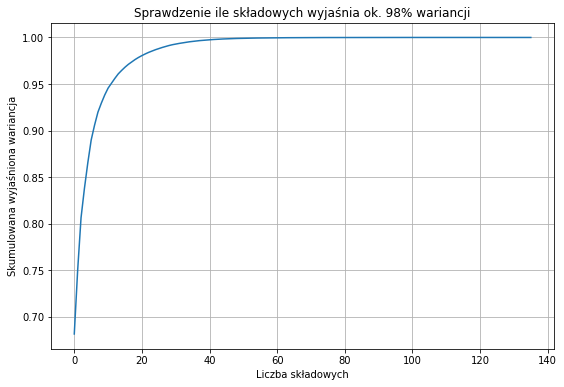

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(train_X)
plt.figure(figsize=(9,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba składowych')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.grid()
plt.title('Sprawdzenie ile składowych wyjaśnia ok. 98% wariancji') ##### ok. 21

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### analogicznie do poprzedniego kodu z autoenkoderem więc nie komentuje tego samego jeszcze raz
scores_l_mod = []
scores_SVM_mod = []
scores_r_mod = []
scores_KNN_mod = []
scores_XGB_mod = []

scores_l_mod_params = []
scores_SVM_mod_params = []
scores_r_mod_params = []
scores_KNN_mod_params = []
scores_XGB_mod_params = []

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_i, test_i in kfold.split(X, y):
  train_X = X[train_i]
  test_X = X[test_i]
  train_y = y[train_i]
  test_y = y[test_i]

  scaler = MinMaxScaler(feature_range=(-1,1))

  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  # wybiera minimalna liczbe głównych składowych tak aby zachowac 98% wariancji
  pca = PCA(.98)
  # redukcja liczby cech dla zbioru treningowego i testowego z wykorzystaniem PCA
  train_X = pca.fit_transform(train_X)
  test_X = pca.transform(test_X)

  PCA_train_X = train_X
  PCA_test_X = test_X

  log_est, log_param = Log_Reg(train_X, train_y)
  svm_est, svm_param = SVM(train_X, train_y)
  forest_est, forest_param = Ran_For(train_X, train_y)
  knn_est, knn_param = KNN(train_X, train_y)
  xgb_est, xgb_param = XGB(train_X, train_y)

  scores_l_mod_params.append(log_param)
  scores_SVM_mod_params.append(svm_param)
  scores_r_mod_params.append(forest_param)
  scores_KNN_mod_params.append(knn_param)
  scores_XGB_mod_params.append(xgb_param)

    # scores
  scores_l_mod.append(score(log_est, test_X, test_y))
  scores_SVM_mod.append(score(svm_est, test_X,  test_y))
  scores_r_mod.append(score(forest_est, test_X, test_y))
  scores_KNN_mod.append(score(knn_est, test_X,  test_y))
  scores_XGB_mod.append(score(xgb_est, test_X, test_y))

  # scores to dataframe

results_df_Log_Reg_mod_params = pd.DataFrame(scores_l_mod_params)
results_df_SVM_mod_params = pd.DataFrame(scores_SVM_mod_params) 
results_df_Ran_For_mod_params = pd.DataFrame(scores_r_mod_params)
results_df_KNN_mod_params = pd.DataFrame(scores_KNN_mod_params)
results_df_XGB_mod_params = pd.DataFrame(scores_XGB_mod_params)

results_df_Log_Reg_mod = pd.DataFrame(scores_l_mod, columns=['Log_Res_f1', 'Log_Res_precision', 'Log_Res_recall', 'Log_Res_MCC'])
results_df_SVM_mod = pd.DataFrame(scores_SVM_mod, columns=['SVM_f1', 'SVM_precision', 'SVM_recall', 'SVM_MCC']) 
results_df_Ran_For_mod = pd.DataFrame(scores_r_mod, columns=['Ran_For_f1', 'Ran_For_precision', 'Ran_For_recall', 'Ran_For_MCC'])
results_df_KNN_mod = pd.DataFrame(scores_KNN_mod, columns=['KNN_f1', 'KNN_precision', 'KNN_recall', 'KNN_MCC'])
results_df_XGB_mod = pd.DataFrame(scores_XGB_mod, columns=['XGB_f1', 'XGB_precision', 'XGB_recall', 'XGB_MCC'])

results_df_PCA = pd.concat([results_df_Log_Reg_mod, results_df_SVM_mod, results_df_Ran_For_mod, results_df_KNN_mod, results_df_XGB_mod], axis=1)
results_df_PCA = results_df_PCA.T
results_df_PCA.rename(columns={0:'0_PCA', 1:'1_PCA', 2:'2_PCA', 3:'3_PCA', 4:'4_PCA'}, inplace=True)
results_df_PCA

,0_PCA,1_PCA,2_PCA,3_PCA,4_PCA
Log_Res_f1,0.610169,0.584615,0.561404,0.539130,0.578512
Log_Res_precision,0.631579,0.550725,0.592593,0.563636,0.573770
Log_Res_recall,0.590164,0.622951,0.533333,0.516667,0.583333
Log_Res_MCC,0.208098,0.049792,0.133455,0.080303,0.110707
SVM_f1,0.568966,0.548673,0.548673,0.548673,0.576577
SVM_precision,0.600000,0.596154,0.584906,0.584906,0.627451
SVM_recall,0.540984,0.508197,0.516667,0.516667,0.533333
SVM_MCC,0.140984,0.119635,0.116915,0.116915,0.188912
Ran_For_f1,0.699301,0.524590,0.583333,0.635659,0.582677
Ran_For_precision,0.609756,0.524590,0.583333,0.594203,0.552239


In [ ]:
results_df_Log_Reg_mod_params

,C,max_iter,solver
0,0.01,500,liblinear
1,0.50,500,newton-cg
2,0.01,500,newton-cg
3,0.01,500,liblinear
4,0.05,500,liblinear


In [ ]:
results_df_SVM_mod_params

,C,gamma,kernel
0,0.1,1,sigmoid
1,0.1,0.01,sigmoid
2,0.1,scale,rbf
3,0.1,scale,sigmoid
4,0.1,0.1,poly


In [ ]:
results_df_Ran_For_mod_params

,bootstrap,max_depth,max_features,n_estimators
0,True,2,15,22
1,False,5,10,30
2,False,2,10,5
3,True,2,15,10
4,True,2,10,100


In [ ]:
results_df_KNN_mod_params

,metric,n_neighbors,weights
0,manhattan,13,uniform
1,euclidean,13,uniform
2,manhattan,14,uniform
3,manhattan,13,uniform
4,manhattan,13,uniform


In [ ]:
results_df_XGB_mod_params

,colsample_bylevel,colsample_bytree,learning_rate,max_depth,n_estimators,subsample
0,0.5,1.0,0.10,3,5,0.5
1,1.0,1.0,0.10,3,10,1.0
2,0.5,0.5,0.01,3,50,1.0
3,0.5,0.5,0.01,5,5,0.5
4,1.0,0.5,0.10,3,5,1.0


---

# **FEATURE SELECTION + klasyczne modele**

---



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#### analogicznie jak przy wykorzystaniu PCA i autoenkodera więc nie komentuje tego samego jeszcze raz 

scores_l_mod = []
scores_SVM_mod = []
scores_r_mod = []
scores_KNN_mod = []
scores_XGB_mod = []

scores_l_mod_params = []
scores_SVM_mod_params = []
scores_r_mod_params = []
scores_KNN_mod_params = []
scores_XGB_mod_params = []

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_i, test_i in kfold.split(X, y):
  train_X = X[train_i]
  test_X = X[test_i]
  train_y = y[train_i]
  test_y = y[test_i]

  scaler = MinMaxScaler(feature_range=(-1,1))

  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  # selekcja cech z wykorzystaniem funkcji testu f do klasyfikacji, redukcja liczby cech do 21 - tyle wyszlo z PCA
  selector = SelectKBest(f_classif, k=21)
  train_X = selector.fit_transform(train_X, train_y)
  test_X = selector.transform(test_X)

  fs_train_X = train_X
  fs_test_X = test_X

  log_est, log_param = Log_Reg(train_X, train_y)
  svm_est, svm_param = SVM(train_X, train_y)
  forest_est, forest_param = Ran_For(train_X, train_y)
  knn_est, knn_param = KNN(train_X, train_y)
  xgb_est, xgb_param = XGB(train_X, train_y)

  scores_l_mod_params.append(log_param)
  scores_SVM_mod_params.append(svm_param)
  scores_r_mod_params.append(forest_param)
  scores_KNN_mod_params.append(knn_param)
  scores_XGB_mod_params.append(xgb_param)

  scores_l_mod.append(score(log_est, test_X, test_y))
  scores_SVM_mod.append(score(svm_est, test_X,  test_y))
  scores_r_mod.append(score(forest_est, test_X, test_y))
  scores_KNN_mod.append(score(knn_est, test_X,  test_y))
  scores_XGB_mod.append(score(xgb_est, test_X, test_y))

results_df_Log_Reg_mod_params = pd.DataFrame(scores_l_mod_params)
results_df_SVM_mod_params = pd.DataFrame(scores_SVM_mod_params) 
results_df_Ran_For_mod_params = pd.DataFrame(scores_r_mod_params)
results_df_KNN_mod_params = pd.DataFrame(scores_KNN_mod_params)
results_df_XGB_mod_params = pd.DataFrame(scores_XGB_mod_params)

results_df_Log_Reg_mod = pd.DataFrame(scores_l_mod, columns=['Log_Res_f1', 'Log_Res_precision', 'Log_Res_recall', 'Log_Res_MCC'])
results_df_SVM_mod = pd.DataFrame(scores_SVM_mod, columns=['SVM_f1', 'SVM_precision', 'SVM_recall', 'SVM_MCC']) 
results_df_Ran_For_mod = pd.DataFrame(scores_r_mod, columns=['Ran_For_f1', 'Ran_For_precision', 'Ran_For_recall', 'Ran_For_MCC'])
results_df_KNN_mod = pd.DataFrame(scores_KNN_mod, columns=['KNN_f1', 'KNN_precision', 'KNN_recall', 'KNN_MCC'])
results_df_XGB_mod = pd.DataFrame(scores_XGB_mod, columns=['XGB_f1', 'XGB_precision', 'XGB_recall', 'XGB_MCC'])

results_df_FS = pd.concat([results_df_Log_Reg_mod, results_df_SVM_mod, results_df_Ran_For_mod, results_df_KNN_mod, results_df_XGB_mod], axis=1)
results_df_FS = results_df_FS.T
results_df_FS.rename(columns={0:'0_FS', 1:'1_FS', 2:'2_FS', 3:'3_FS', 4:'4_FS'}, inplace=True)
results_df_FS

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

,0_FS,1_FS,2_FS,3_FS,4_FS
Log_Res_f1,0.640625,0.548673,0.556522,0.564103,0.586207
Log_Res_precision,0.611940,0.596154,0.581818,0.578947,0.607143
Log_Res_recall,0.672131,0.508197,0.533333,0.550000,0.566667
Log_Res_MCC,0.201579,0.119635,0.115152,0.113533,0.166566
SVM_f1,0.630137,0.553571,0.548673,0.611570,0.563636
SVM_precision,0.541176,0.607843,0.584906,0.606557,0.620000
SVM_recall,0.754098,0.508197,0.516667,0.616667,0.516667
SVM_MCC,0.050786,0.138458,0.116915,0.180467,0.172524
Ran_For_f1,0.531250,0.578512,0.571429,0.610687,0.606557
Ran_For_precision,0.507463,0.583333,0.576271,0.563380,0.596774


In [ ]:
results_df_Log_Reg_mod_params

,C,max_iter,solver
0,0.01,500,newton-cg
1,0.01,500,liblinear
2,0.01,500,newton-cg
3,0.05,500,newton-cg
4,0.10,500,newton-cg


In [ ]:
results_df_SVM_mod_params

,C,gamma,kernel
0,0.05,1.00,sigmoid
1,0.05,0.10,rbf
2,1.00,0.01,rbf
3,0.10,0.10,poly
4,0.05,0.10,sigmoid


In [ ]:
results_df_Ran_For_mod_params

,bootstrap,max_depth,max_features,n_estimators
0,True,10,5,26
1,False,5,10,5
2,True,2,auto,14
3,True,3,5,100
4,True,2,15,14


In [ ]:
results_df_KNN_mod_params

,metric,n_neighbors,weights
0,manhattan,3,uniform
1,euclidean,29,distance
2,euclidean,21,uniform
3,euclidean,14,distance
4,manhattan,23,uniform


In [ ]:
results_df_XGB_mod_params

,colsample_bylevel,colsample_bytree,learning_rate,max_depth,n_estimators,subsample
0,1.0,0.5,0.01,3,10,0.5
1,1.0,1.0,0.10,5,5,0.5
2,0.5,0.5,0.01,5,20,0.5
3,1.0,0.5,0.10,3,5,1.0
4,0.5,1.0,0.01,3,20,0.5


In [ ]:
## czy wszystkie techniki doprowadziły do zmniejszenia wymiarowości o tej samej wartości (21)
print(PCA_train_X.shape)
print(AE_train_X.shape)
print(fs_train_X.shape)

(461, 21)
(461, 21)
(461, 21)


# **WYKRESY po redukcji liczby cech**

**AE - wykresy**

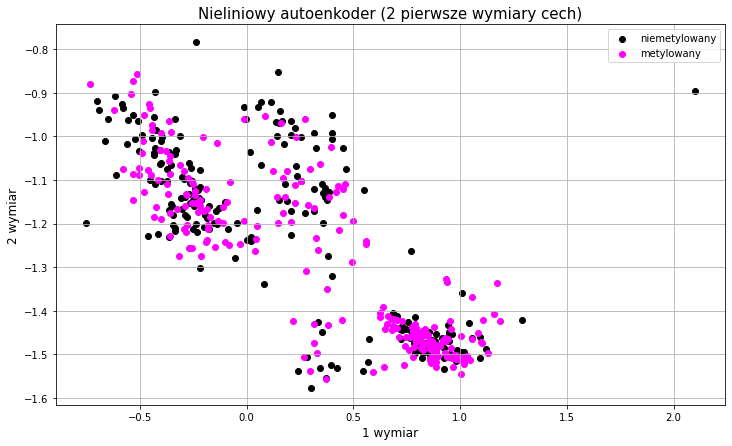

In [ ]:
plt.figure(figsize = (12,7))
plt.scatter(AE_train_X[:,0:2][train_y == 0, 0], AE_train_X[:,2:4][train_y == 0, 1], color='black', label='niemetylowany')
plt.scatter(AE_train_X[:,0:2][train_y == 1, 0], AE_train_X[:,2:4][train_y == 1, 1], color='magenta', label='metylowany')
plt.legend()
plt.title("Nieliniowy autoenkoder (2 pierwsze wymiary cech)", fontsize= 15)  
plt.xlabel("1 wymiar", fontsize= 12)
plt.ylabel("2 wymiar", fontsize= 12)
plt.grid()
plt.show()

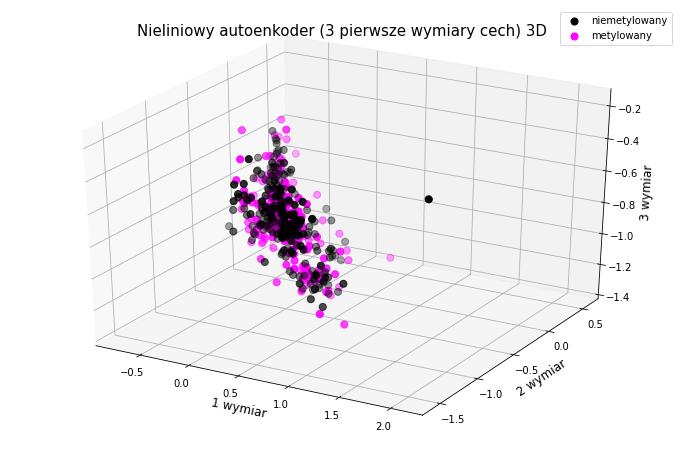

In [ ]:
### wykres 3D trzech pierwszych wymiarów po redukcji wymiarowości przez autoenkoder 

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

X, Y, Z = AE_train_X[:,0], AE_train_X[:,1], AE_train_X[:,2]

ax.scatter(X[train_y==0], Y[train_y==0], Z[train_y==0], c='black', s=50, label='niemetylowany')
ax.scatter(X[train_y==1], Y[train_y==1], Z[train_y==1], c='magenta', s=50, label='metylowany')

ax.set_xlabel("1 wymiar", fontsize=12)
ax.set_ylabel("2 wymiar", fontsize=12)
ax.set_zlabel("3 wymiar", fontsize=12)
plt.title('Nieliniowy autoenkoder (3 pierwsze wymiary cech) 3D', fontsize=15)
ax.legend()
plt.show()

**PCA - wykresy**

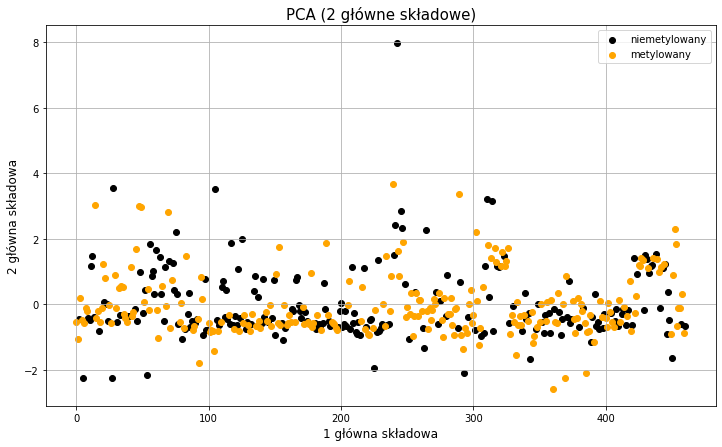

In [ ]:
plt.figure(figsize = (12,7))
plt.scatter(PCA_train_X[:,0:2][train_y == 0, 0], PCA_train_X[:,2:4][train_y == 0, 1], color='black', alpha=1, label='niemetylowany')
plt.scatter(PCA_train_X[:,0:2][train_y == 1, 0], PCA_train_X[:,2:4][train_y == 1, 1], color='orange',alpha=1,label='metylowany')
plt.legend()
plt.title("PCA (2 główne składowe)", fontsize= 15)  
plt.xlabel("1 główna składowa", fontsize= 12)
plt.ylabel("2 główna składowa", fontsize= 12)
plt.grid()
plt.show()

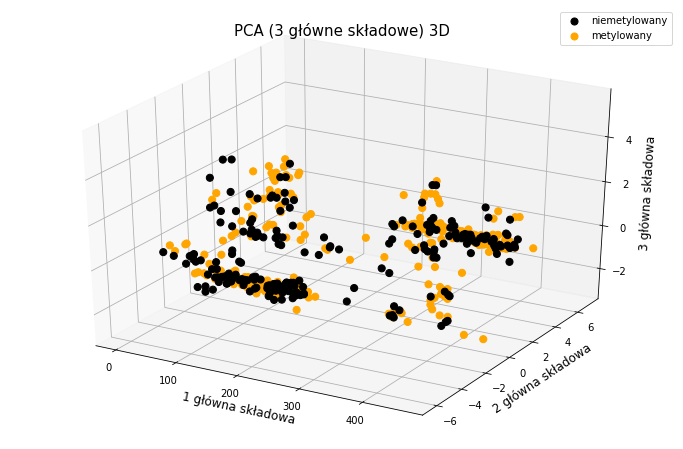

In [ ]:
### wykres 3D trzech pierwszych głównych składowych po redukcji wymiarowości PCA

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

X, Y, Z = PCA_train_X[:,0], PCA_train_X[:,1], PCA_train_X[:,2]

ax.scatter(X[train_y==0], Y[train_y==0], Z[train_y==0], c='black', s=50, alpha=1,label='niemetylowany')
ax.scatter(X[train_y==1], Y[train_y==1], Z[train_y==1], c='orange', s=50, alpha=1,label='metylowany')

ax.set_xlabel("1 główna składowa", fontsize=12)
ax.set_ylabel("2 główna składowa", fontsize=12)
ax.set_zlabel("3 główna składowa", fontsize=12)
plt.title('PCA (3 główne składowe) 3D', fontsize=15)
ax.legend()
plt.show()

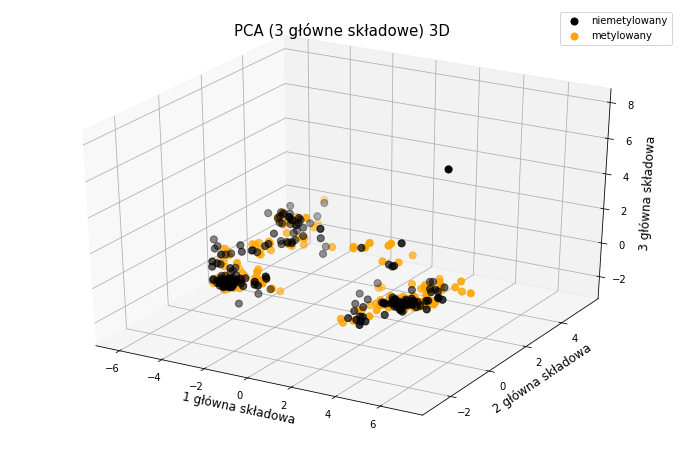

In [ ]:
### wykres 3D trzech pierwszych głównych składowych po redukcji wymiarowości PCA

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

X, Y, Z = PCA_train_X[:,0], PCA_train_X[:,1], PCA_train_X[:,2]

ax.scatter(X[train_y==0], Y[train_y==0], Z[train_y==0], c='black', s=50, label='niemetylowany')
ax.scatter(X[train_y==1], Y[train_y==1], Z[train_y==1], c='orange', s=50, label='metylowany')

ax.set_xlabel("1 główna składowa", fontsize=12)
ax.set_ylabel("2 główna składowa", fontsize=12)
ax.set_zlabel("3 główna składowa", fontsize=12)
plt.title('PCA (3 główne składowe) 3D', fontsize=15)
ax.legend()
plt.show()

**selekcja cech - wykresy** 

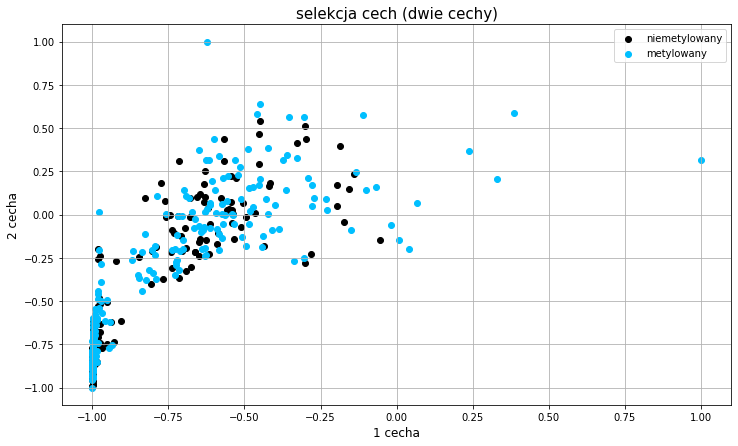

In [ ]:
plt.figure(figsize = (12,7))
plt.scatter(fs_train_X[:,1:3][train_y == 0, 0], fs_train_X[:,2:4][train_y == 0, 1], color='black', label='niemetylowany')
plt.scatter(fs_train_X[:,1:3][train_y == 1, 0], fs_train_X[:,2:4][train_y == 1, 1], color='deepskyblue', label='metylowany')
plt.legend()
plt.title("selekcja cech (dwie cechy)", fontsize= 15)  
plt.xlabel("1 cecha", fontsize= 12)
plt.ylabel("2 cecha", fontsize= 12)
plt.grid()
plt.show()

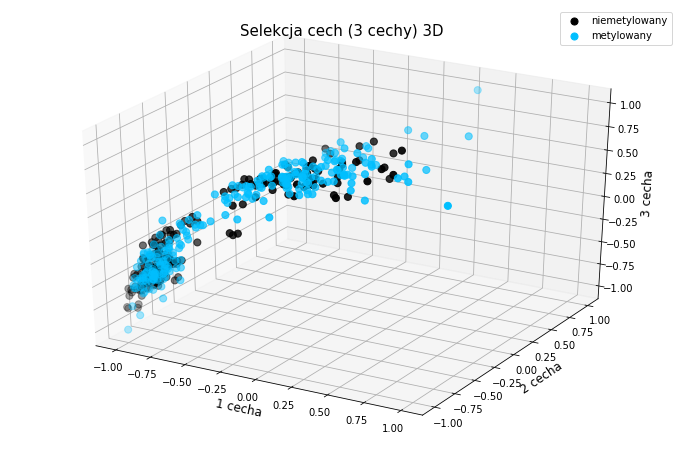

In [ ]:
### wykres 3D trzech cech po selekcji najważniejszych cech 

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

X, Y, Z = fs_train_X[:,0], fs_train_X[:,1], fs_train_X[:,2]

ax.scatter(X[train_y==0], Y[train_y==0], Z[train_y==0], c='black', s=50, label='niemetylowany')
ax.scatter(X[train_y==1], Y[train_y==1], Z[train_y==1], c='deepskyblue', s=50, label='metylowany')

ax.set_xlabel("1 cecha", fontsize=12)
ax.set_ylabel("2 cecha", fontsize=12)
ax.set_zlabel("3 cecha", fontsize=12)
plt.title('Selekcja cech (3 cechy) 3D', fontsize=15)
ax.legend()
plt.show()

In [ ]:
# stworzenie ramki danych z cech po redukcji liczby cech i zmiana nazw kolumn potrzebne do stworzenia wykresów pudełkowych
PCA2_train_X = pd.DataFrame(PCA_train_X)
for i in range(PCA_train_X.shape[1]):
  PCA2_train_X.rename(columns={i:f'col_{i}'}, inplace=True)

AE2_train_X = pd.DataFrame(AE_train_X)
for i in range(AE_train_X.shape[1]):
  AE2_train_X.rename(columns={i:f'col_{i}'}, inplace=True)

fs2_train_X = pd.DataFrame(fs_train_X)
for i in range(fs_train_X.shape[1]):
  fs2_train_X.rename(columns={i:f'col_{i}'}, inplace=True)

**wykresy pudełkowe cech po redukcji liczby cech**

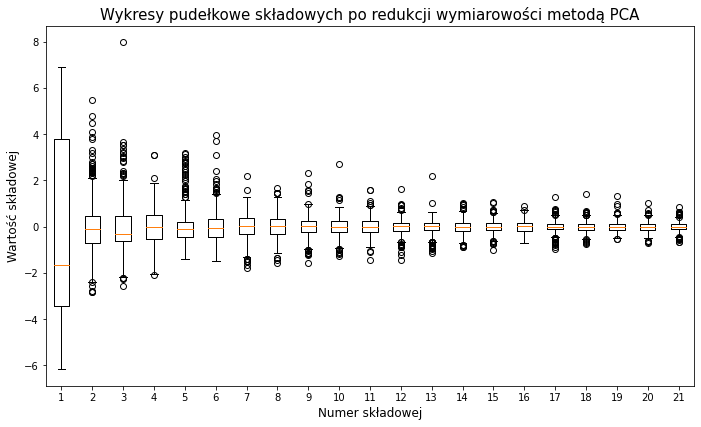

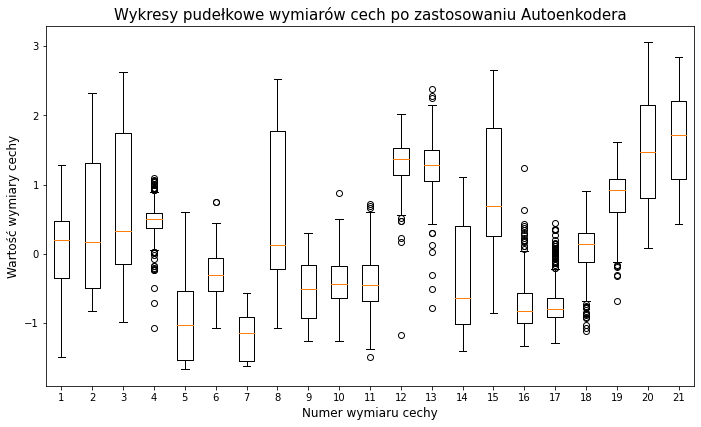

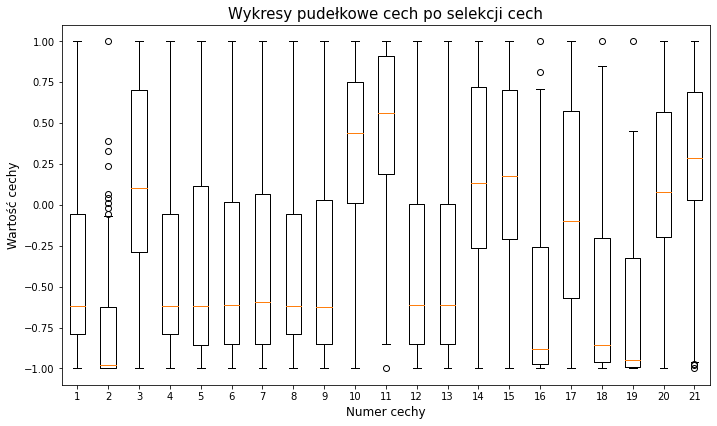

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [PCA2_train_X[f'{x}'] for x in PCA2_train_X.columns]
fig = plt.figure(figsize =(9, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(data)
plt.title('Wykresy pudełkowe składowych po redukcji wymiarowości metodą PCA', fontsize=15)
plt.xlabel('Numer składowej', fontsize=12)
plt.ylabel('Wartość składowej', fontsize=12)
plt.show()

data2 = [AE2_train_X[f'{x}'] for x in AE2_train_X.columns]
fig = plt.figure(figsize =(9, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(data2)
plt.title('Wykresy pudełkowe wymiarów cech po zastosowaniu Autoenkodera', fontsize=15)
plt.xlabel('Numer wymiaru cechy', fontsize=12)
plt.ylabel('Wartość wymiary cechy', fontsize=12)
plt.show()

data3 = [fs2_train_X[f'{x}'] for x in fs2_train_X.columns]
fig = plt.figure(figsize =(9, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(data3)
plt.title('Wykresy pudełkowe cech po selekcji cech', fontsize=15)
plt.xlabel('Numer cechy', fontsize=12)
plt.ylabel('Wartość cechy', fontsize=12)
plt.show()

**Zapisanie wyników z klasycznych modeli na dysk żeby nie przepadły**

In [ ]:
from google.colab import  drive

drive.mount('/drive')

PCA2_train_X.to_csv('/drive/MyDrive/classification/results/PCA_trainX_classicmodels.csv')
fs2_train_X.to_csv('/drive/MyDrive/classification/results/FS_trainX_classicmodels.csv')
AE2_train_X.to_csv('/drive/MyDrive/classification/results/AE_trainX_classicmodels.csv')

results_df_AE.to_csv('/drive/MyDrive/classification/results/AE_results_classicmodels.csv')
results_df_FS.to_csv('/drive/MyDrive/classification/results/FS_results_classicmodels.csv')
results_df_PCA.to_csv('/drive/MyDrive/classification/results/PCA_results_classicmodels.csv')

Mounted at /drive


**Odczytanie wyników z klasycznych modeli z dysku**

In [ ]:
import pandas as pd
from google.colab import  drive

drive.mount('/drive')

PCA2_train_X = pd.read_csv('/drive/MyDrive/classification/results/PCA_trainX_classicmodels.csv')
fs2_train_X = pd.read_csv('/drive/MyDrive/classification/results/FS_trainX_classicmodels.csv')
AE2_train_X = pd.read_csv('/drive/MyDrive/classification/results/AE_trainX_classicmodels.csv')

results_df_AE = pd.read_csv('/drive/MyDrive/classification/results/AE_results_classicmodels.csv')
results_df_FS = pd.read_csv('/drive/MyDrive/classification/results/FS_results_classicmodels.csv')
results_df_PCA = pd.read_csv('/drive/MyDrive/classification/results/PCA_results_classicmodels.csv')

Mounted at /drive


In [ ]:
# ustawienie odpowiedniego indexu
results_df_AE.index = results_df_AE['Unnamed: 0']
results_df_PCA.index = results_df_PCA['Unnamed: 0']
results_df_FS.index = results_df_FS['Unnamed: 0']

In [ ]:
# funkcja do implementacji i stworzenia autoenkodera
def autoencoder(train_X, test_X):
  encoder = keras.models.Sequential([
            keras.layers.Dense(50, input_shape=[136], activation='relu'),
            keras.layers.Dense(30, activation='selu'),
            keras.layers.Dense(21, activation='selu'),
            ])

  decoder = keras.models.Sequential([
            keras.layers.Dense(30, input_shape=[21], activation='selu'),
            keras.layers.Dense(50, activation='selu'),
            keras.layers.Dense(136, activation='relu'),
          ])

  autoencoder = keras.models.Sequential([encoder, decoder])
  opt = tf.keras.optimizers.SGD(learning_rate=1, decay=1e-4)
  autoencoder.compile(loss='mse', optimizer = opt)

  callback = keras.callbacks.EarlyStopping(patience=40)
  history = autoencoder.fit(train_X,train_X, epochs=500,validation_split=0.1, callbacks=[callback],verbose=0)

  train_X = encoder.predict(train_X)
  test_X = encoder.predict(test_X)
  return train_X, test_X # zwraca wartości 21 najwazniejszych cech po wykorzystaniu autoenkodera do redukcji liczby cech

In [ ]:
# funkcja zmiany kształtu danych wprowadzanych do sieci neuronowej poniewaz siec wymaga odpowiedniego kształtu danych 
def reshaped(train_X, test_X):
  X_train = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
  X_test = test_X.reshape(test_X.shape[0], 1, train_X.shape[1])
  return X_train, X_test

# **sieć neuronowa**

In [ ]:
import keras
import tensorflow as tf
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA 
from sklearn.model_selection import StratifiedKFold
from keras import regularizers
from sklearn.feature_selection import f_classif, VarianceThreshold
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import BinaryAccuracy
from keras.layers import Dropout, Dense
from keras.regularizers import l1,l2
from keras.callbacks import ModelCheckpoint, EarlyStopping

def NN_pred(reduction): # w zależności od tego czy wykorzystuje PCA, autoenkoder czy selekcje cech to wybiera jedna z nich do redukcji liczby cech 

  # puste listy na wyniki 
  scores_NN_mod = [] 
  results_df_NN_mod=[]
  i=1 # iterator ktory przydaje sie pozniej przy zapisywaniu modelu sieci (a dokladniej przy nazwie pliku)

  X = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  for train_i, test_i in kfold.split(X, y):
    train_X = X[train_i]
    test_X = X[test_i]
    train_y = y[train_i]
    test_y = y[test_i]

    # MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))

    # transform on train and test set
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)
    
    if reduction == 'PCA': # jezeli wybralismy PCA to redukujemy liczbe cech za pomoca tej metody
      pca = PCA(.98)

      train_X = pca.fit_transform(train_X)
      test_X = pca.transform(test_X)

      PCA_train_X_NN = train_X
      PCA_test_X_NN = test_X

    elif reduction == 'AE': # jezeli wybralismy autoenkoder to redukujemy liczbe cech za jego pomoca
      
      train_X, test_X = autoencoder(train_X, test_X)
      AE_train_X = train_X
      AE_test_X = test_X

    elif reduction == 'FS': # jezeli wybralismy selekcje cech to redukujemy liczbe cech za pomoca selekcji cech 
      selector = SelectKBest(f_classif, k=21)
      train_X = selector.fit_transform(train_X, train_y)
      test_X = selector.transform(test_X)

      fs_train_X = train_X
      fs_test_X = test_X

    X_train, X_test = reshaped(train_X, test_X) # zmiana kształtu danych po selekcji cech aby mozna je bylo zaladowac do modelu sieci neuronowej 

    # zmieniam takze ksztalt kolumny wyjsciowej zbioru treningowego 
    train_y = train_y.reshape(-1,1) 
    test_y = test_y.reshape(-1,1)
  # NN
    ''' 
    # siec bez dodanych wiekszych regularyzacji i w tym wypadku tez komentuje EarlyStop i wyrzucamy EarlyStop z callback w funkcji model.fit()
    model_best = Sequential()
    model_best.add(Dense(21, input_shape=(1,X_train.shape[2]), activation = 'relu'))
    model_best.add(Dropout(0.2))
    model_best.add(Dense(10, activation = 'relu'))
    model_best.add(Dropout(0.2))
    model_best.add(Dense(1, activation = 'sigmoid'))
  
    '''
    # siec z dodanymi wiekszymi metodami regularyzacji i z zaimplementowanym wczesnym zatrzymaniem 
    # w celu testowania jak zadziala bez wczesnego zatrzymania nalezy zakomentowac linijke zaczynaja sie od 'EarlyStop=..' i wyrzucic EarlyStop z 'callback' w funkcji model.fit()
    # architektura modelu sieci neuronowej
    model_best = Sequential()
    model_best.add(Dense(21, input_shape=(1,X_train.shape[2]), activation = 'relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model_best.add(Dropout(0.4))
    model_best.add(Dense(10, activation = 'relu', kernel_regularizer=l1(0.0001),  bias_regularizer=l1(0.0001)))
    model_best.add(Dropout(0.4))
    model_best.add(Dense(1, activation = 'sigmoid', kernel_regularizer=l2(0.001),  bias_regularizer=l2(0.001)))

    model_best.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy']) # kompilowanie modelu
    ModelCheck = ModelCheckpoint(filepath=f'{i}_model.h5',monitor='val_accuracy',save_best_only=True, verbose=0) # ustalenie checkpointu sprawdzajacego dokladnosc dla zbioru walidacyjnego, dla najwyzszej model zapisuje najlepszy model

    EarlyStop = EarlyStopping(monitor='val_loss', patience=30, verbose=0) # wczesne zatrzymanie stopujące trenowanie jezeli nie poprawi sie blad dla zbioru walidacyjnego przez 30 epok
    history=model_best.fit(X_train, train_y, epochs=4000,  verbose=0, batch_size=64, callbacks=[ModelCheck, EarlyStop],  validation_split=0.1, shuffle=False) # uczenie modelu 

    if reduction == 'PCA': # jezeli wybralismy PCA to model bedzie zapisywany z nazwa 'PCA' z przodu i numerem fałdu z kros walidacji 

      model_best.save(f'{i}_PCA_NN_Model.h5')
      loaded_model = load_model(f'{i}_PCA_NN_Model.h5') # i od razu ładowany 

    elif reduction == 'AE': # jezeli wybralismy autoenkoder to model bedzie zapisywany z nazwa 'AE' z przodu i numerem fałdu z kros walidacji 

      model_best.save(f'{i}_AE_NN_Model.h5')
      loaded_model = load_model(f'{i}_AE_NN_Model.h5')

    elif reduction == 'FS': # jezeli wybralismy selekcje cech to model bedzie zapisywany z nazwa 'FS' z przodu i numerem fałdu z kros walidacji 

      model_best.save(f'{i}_FS_NN_Model.h5')
      loaded_model = load_model(f'{i}_FS_NN_Model.h5')

    else:
      print("Somenthing is wrong...")
    i+=1
    y_pred = loaded_model.predict(X_test) # wybrany model (po PCA, autoenkoderze lub selekcji cech) przewiduje status metylacji promotora MGMT dla zbioru testowego 
    y_pred = y_pred.astype(float).round() # typ zmiennoprzecinkowy
    y_pred = y_pred.reshape(-1,1) # zmiana ksztaltu danych przewidywanych
    # model oceniany na podstawie metryk F1, precyzji, czułości i MCC- zapisanie wyników do listy 
    scores_NN_mod.append((f1_score(test_y, y_pred), precision_score(test_y, y_pred), recall_score(test_y, y_pred), matthews_corrcoef(test_y, y_pred))) 

  # zamiana listy w ramke danych z odpowiednimi nazwami kolumn (NN - neural network + metryka)
  results_df_NN = pd.DataFrame(scores_NN_mod, columns=['NN_f1', 'NN_precision', 'NN_recall', 'NN_MCC'])
  results_df_NN = results_df_NN.T
  results_df_NN.rename(columns={0:'0_NN', 1:'1_NN', 2:'2_NN', 3:'3_NN', 4:'4_NN'}, inplace=True)
  results_df_NN 

  return results_df_NN, history # oprocz ramki danych z wynikami zwraca tez historie treningu modelu potrzebna do wizualizacji na wykresach

In [ ]:
# wywolanie funkcji stworzonej w komorce wyzej z odpowiednia metoda do redukcji liczby cech 
results_df_NN_AE, history_AE = NN_pred('AE')
results_df_NN_PCA, history_PCA = NN_pred('PCA')
results_df_NN_FS, history_FS = NN_pred('FS')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, 

In [ ]:
# zmiana nazw kolumn i polaczenie ramki danych z wynikami z klasycznych modeli i tymi z sieci neuronowej 
results_df_NN_AE.rename(columns={'0_NN':'0_AE', '1_NN':'1_AE','2_NN':'2_AE','3_NN':'3_AE','4_NN':'4_AE'}, inplace=True)
results_df_NN_PCA.rename(columns={'0_NN':'0_PCA', '1_NN':'1_PCA','2_NN':'2_PCA','3_NN':'3_PCA','4_NN':'4_PCA'}, inplace=True)
results_df_NN_FS.rename(columns={'0_NN':'0_FS', '1_NN':'1_FS','2_NN':'2_FS','3_NN':'3_FS','4_NN':'4_FS'}, inplace=True)
results_PCA = pd.concat([results_df_PCA, results_df_NN_PCA], axis=0)
results_AE = pd.concat([results_df_AE, results_df_NN_AE], axis=0)
results_FS = pd.concat([results_df_FS, results_df_NN_FS], axis=0)
# usuniecie zbednej kolumny z kazdej z ramki danych 
results_PCA.drop(columns='Unnamed: 0', axis=1, inplace=True)
results_AE.drop(columns='Unnamed: 0', axis=1, inplace=True)
results_FS.drop(columns='Unnamed: 0', axis=1, inplace=True)



---



---


# **WIZUALIZACJE WYNIKOW**


---



---



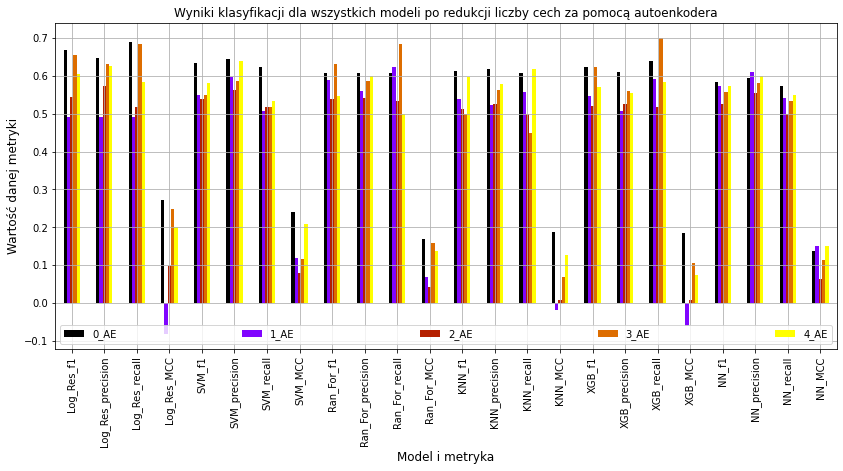

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle, islice

ax = results_AE.plot(kind='bar', figsize=(14, 6), legend=True, colormap='gnuplot')
ax.set_xlabel("Model i metryka", fontsize=12)
ax.set_ylabel("Wartość danej metryki", fontsize=12)
plt.legend(loc="lower left", mode = "expand", ncol = 5)
plt.title("Wyniki klasyfikacji dla wszystkich modeli po redukcji liczby cech za pomocą autoenkodera")
plt.grid()
plt.show()

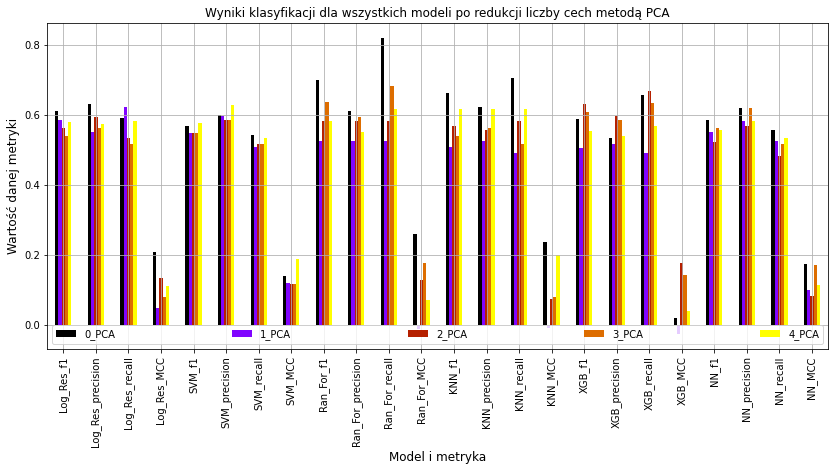

In [ ]:
ax = results_PCA.plot(kind='bar', figsize=(14, 6), legend=True, colormap='gnuplot')
ax.set_xlabel("Model i metryka", fontsize=12)
ax.set_ylabel("Wartość danej metryki", fontsize=12)
plt.legend(loc="lower left", mode = "expand", ncol = 5)
plt.title("Wyniki klasyfikacji dla wszystkich modeli po redukcji liczby cech metodą PCA")
plt.grid()
plt.show()

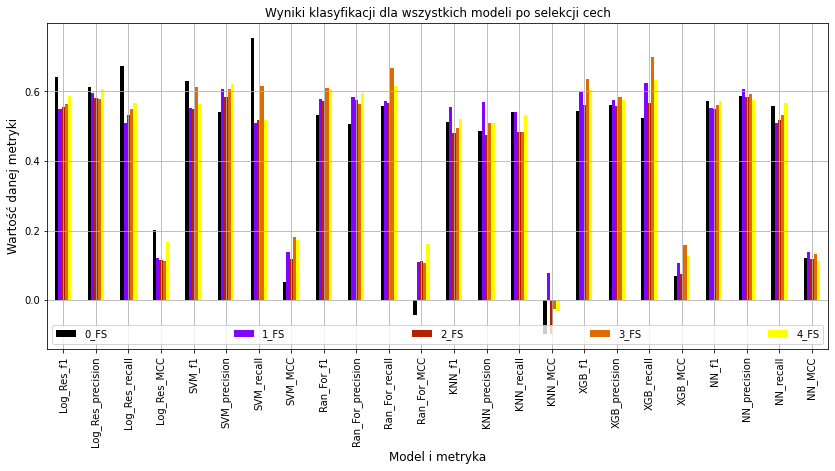

In [ ]:
ax = results_FS.plot(kind='bar', figsize=(14, 6), legend=True, colormap='gnuplot')
ax.set_xlabel("Model i metryka", fontsize=12)
ax.set_ylabel("Wartość danej metryki", fontsize=12)
plt.legend(loc="lower left", mode = "expand", ncol = 5)
plt.title("Wyniki klasyfikacji dla wszystkich modeli po selekcji cech")
plt.grid()
plt.show()

In [ ]:
# usrednienie wynikow dla wszystkich fałdow z walidacji krzyzowej 
results_PCA['mean'] = results_PCA.mean(axis=1)
results_AE['mean'] = results_AE.mean(axis=1)
results_FS['mean'] = results_FS.mean(axis=1)

In [ ]:
# stworzenie osobnych ramek danych dla kazdej metody i zmiana nazw kolumn zeby bylo wiadomo ktora metode do redukcji liczby cech wykorzystalismy 
mean_PCA = pd.DataFrame(results_PCA['mean'])
mean_PCA.rename(columns={'mean':'mean_PCA'}, inplace=True)
mean_AE = pd.DataFrame(results_AE['mean'])
mean_AE.rename(columns={'mean':'mean_AE'}, inplace=True)
mean_FS = pd.DataFrame(results_FS['mean'])
mean_FS.rename(columns={'mean':'mean_FS'}, inplace=True)

In [ ]:
# polaczenie wszystkich ramek danych ze usrednionymi wynikami w jedna ramke danych 
mean = pd.concat([mean_PCA, mean_AE, mean_FS], axis=1)

In [ ]:
mean_normal = round(mean,2)
mean_normal.to_csv('mean_normal_wyniki.csv')
mean_normal

,mean_PCA,mean_AE,mean_FS
Log_Res_f1,0.57,0.59,0.58
Log_Res_precision,0.58,0.59,0.60
Log_Res_recall,0.57,0.59,0.57
Log_Res_MCC,0.12,0.15,0.14
SVM_f1,0.56,0.57,0.58
SVM_precision,0.60,0.61,0.59
SVM_recall,0.52,0.54,0.58
SVM_MCC,0.14,0.15,0.13
Ran_For_f1,0.61,0.58,0.58
Ran_For_precision,0.57,0.58,0.57


In [ ]:
# wyniki srednie dla sieci z dodanymi metodami regularyzacji 
mean_normal_reg = round(mean,2)
mean_normal_reg.to_csv('mean_normal_reg_wyniki.csv')
mean_normal_reg

,mean_PCA,mean_AE,mean_FS
Log_Res_f1,0.57,0.59,0.58
Log_Res_precision,0.58,0.59,0.60
Log_Res_recall,0.57,0.59,0.57
Log_Res_MCC,0.12,0.15,0.14
SVM_f1,0.56,0.57,0.58
SVM_precision,0.60,0.61,0.59
SVM_recall,0.52,0.54,0.58
SVM_MCC,0.14,0.15,0.13
Ran_For_f1,0.61,0.58,0.58
Ran_For_precision,0.57,0.58,0.57


In [ ]:
# wyniki srednie dla sieci z dodanymi metodami regularyzacji i zaimplementowanym wczesnym zatrzymaniem
mean_normal_reg_ES = round(mean,2)
mean_normal_reg_ES.to_csv('mean_normal_reg_EarlyStop_wyniki.csv')
mean_normal_reg_ES

,mean_PCA,mean_AE,mean_FS
Log_Res_f1,0.57,0.59,0.58
Log_Res_precision,0.58,0.59,0.60
Log_Res_recall,0.57,0.59,0.57
Log_Res_MCC,0.12,0.15,0.14
SVM_f1,0.56,0.57,0.58
SVM_precision,0.60,0.61,0.59
SVM_recall,0.52,0.54,0.58
SVM_MCC,0.14,0.15,0.13
Ran_For_f1,0.61,0.58,0.58
Ran_For_precision,0.57,0.58,0.57


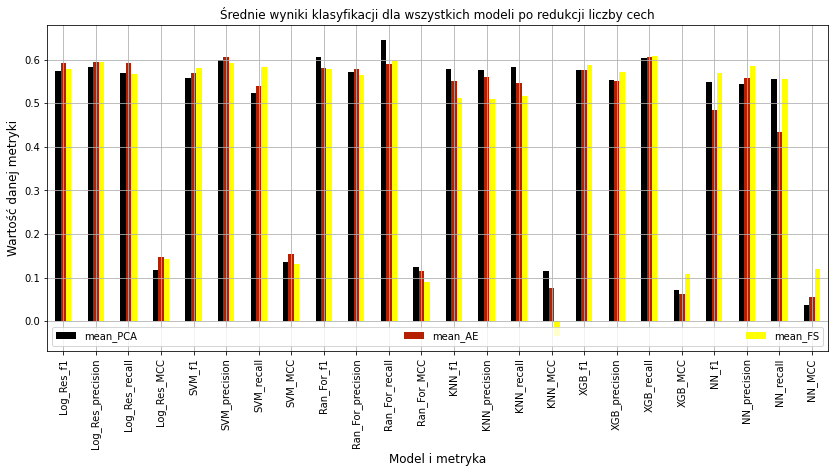

In [ ]:
# wizualizacja srednich wynikow w zaleznosci od metody redukcji liczby cech
ax = mean.plot(kind='bar', figsize=(14, 6), legend=True, colormap='gnuplot')
ax.set_xlabel("Model i metryka", fontsize=12)
ax.set_ylabel("Wartość danej metryki", fontsize=12)
plt.legend(loc="lower left", mode = "expand", ncol = 3)
plt.title("Średnie wyniki klasyfikacji dla wszystkich modeli po redukcji liczby cech")
plt.grid()
plt.show()

# **Wykresy historii treningu modelu sieci dla zbioru treningowego i walidacyjnego**

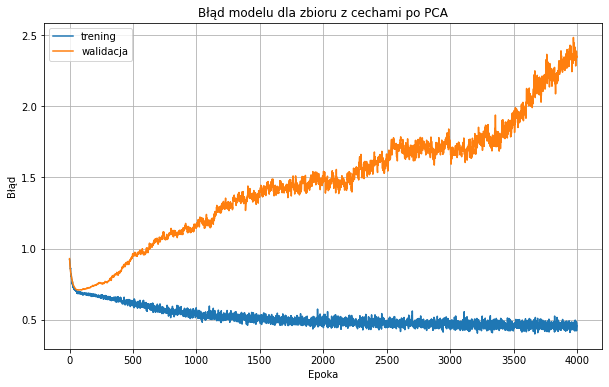

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_PCA.history['loss'])
plt.plot(history_PCA.history['val_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.legend(['trening', 'walidacja'])
plt.title('Błąd modelu dla zbioru z cechami po PCA')
plt.grid()
plt.show()

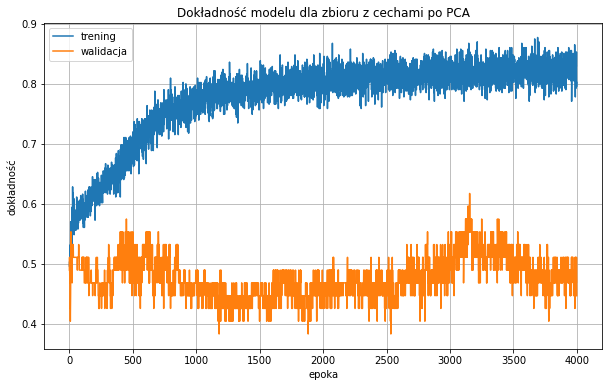

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history_PCA.history['accuracy'])
plt.plot(history_PCA.history['val_accuracy'])
plt.xlabel('epoka')
plt.ylabel('dokładność')
plt.title('Dokładność modelu dla zbioru z cechami po PCA')
plt.legend(['trening', 'walidacja'])
plt.grid()
plt.show()

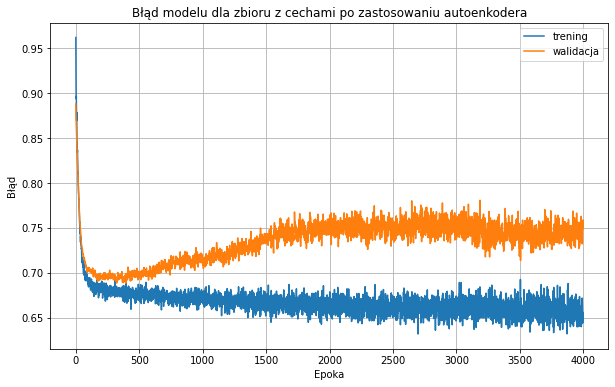

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_AE.history['loss'])
plt.plot(history_AE.history['val_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.legend(['trening', 'walidacja'])
plt.title('Błąd modelu dla zbioru z cechami po zastosowaniu autoenkodera')
plt.grid()
plt.show()

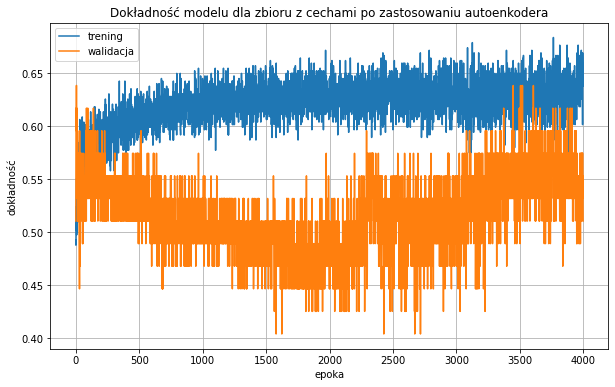

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history_AE.history['accuracy'])
plt.plot(history_AE.history['val_accuracy'])
plt.xlabel('epoka')
plt.ylabel('dokładność')
plt.title('Dokładność modelu dla zbioru z cechami po zastosowaniu autoenkodera')
plt.legend(['trening', 'walidacja'])
plt.grid()
plt.show()

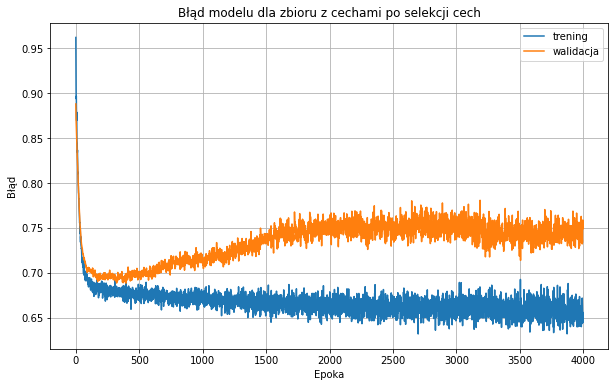

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_AE.history['loss'])
plt.plot(history_AE.history['val_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.legend(['trening', 'walidacja'])
plt.title('Błąd modelu dla zbioru z cechami po selekcji cech')
plt.grid()
plt.show()

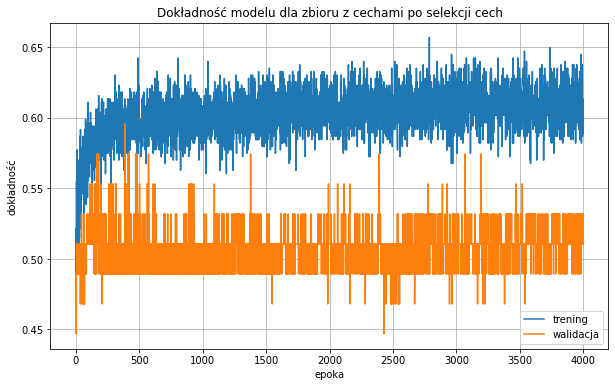

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history_FS.history['accuracy'])
plt.plot(history_FS.history['val_accuracy'])
plt.xlabel('epoka')
plt.ylabel('dokładność')
plt.title('Dokładność modelu dla zbioru z cechami po selekcji cech')
plt.legend(['trening', 'walidacja'])
plt.grid()
plt.show()

In [ ]:
#results_df_NN_PCA_normal = results_df_NN_PCA
#results_df_NN_AE_normal = results_df_NN_AE
#results_df_NN_FS_normal = results_df_NN_FS

#results_df_NN_PCA_normal_reg = results_df_NN_PCA
#results_df_NN_AE_normal_reg = results_df_NN_AE
#results_df_NN_FS_normal_reg = results_df_NN_FS

#results_df_NN_PCA_normal_ES = results_df_NN_PCA
#results_df_NN_AE_normal_ES = results_df_NN_AE
#results_df_NN_FS_normal_ES = results_df_NN_FS


In [ ]:
#history_AE_normal = history_AE
#history_PCA_normal = history_PCA
#history_FS_normal = history_FS

#history_AE_normal_reg = history_AE
#history_PCA_normal_reg = history_PCA
#history_FS_normal_reg = history_FS

#history_AE_normal_ES = history_AE
#history_PCA_normal_ES = history_PCA
#history_FS_normal_ES = history_FS

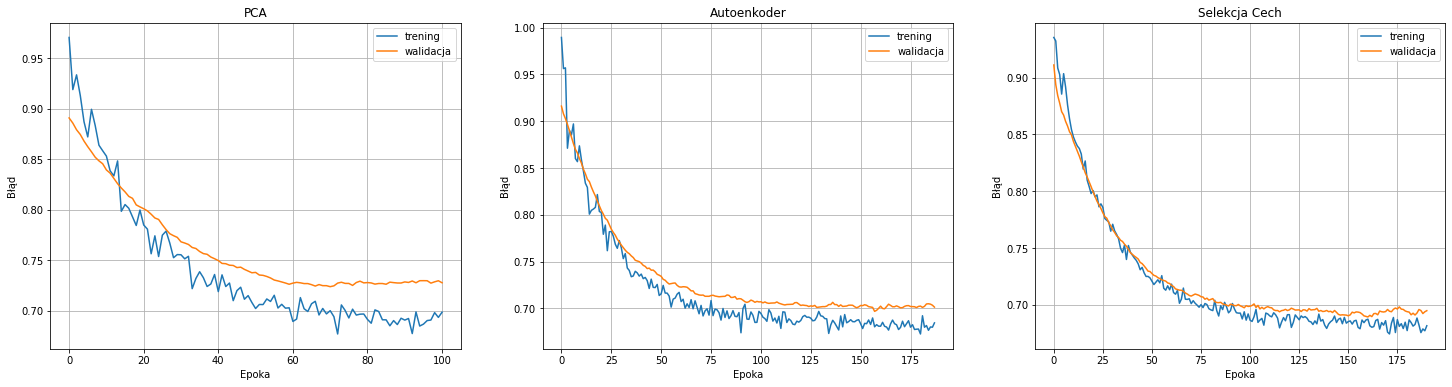

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
plt.plot(history_PCA.history['loss'])
plt.plot(history_PCA.history['val_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.legend(['trening', 'walidacja'])
plt.title('PCA')
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(history_AE.history['loss'])
plt.plot(history_AE.history['val_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.legend(['trening', 'walidacja'])
plt.title('Autoenkoder')
plt.grid()
plt.subplot(1, 3, 3)
plt.plot(history_FS.history['loss'])
plt.plot(history_FS.history['val_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.legend(['trening', 'walidacja'])
plt.title('Selekcja Cech')
plt.grid()
plt.savefig('NN_loss_normal.png')
plt.show()

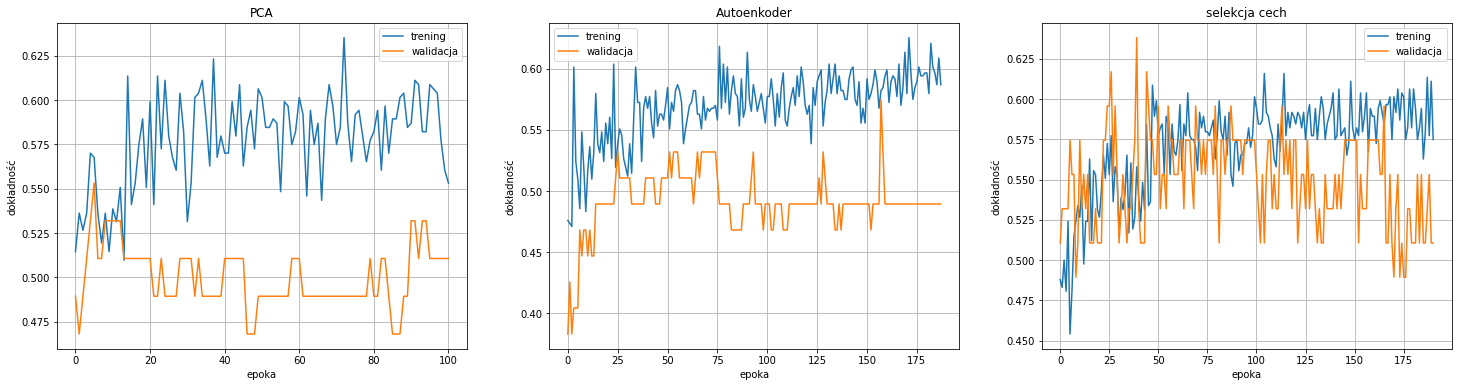

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
plt.plot(history_PCA.history['accuracy'])
plt.plot(history_PCA.history['val_accuracy'])
plt.xlabel('epoka')
plt.ylabel('dokładność')
plt.title('PCA')
plt.legend(['trening', 'walidacja'])
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(history_AE.history['accuracy'])
plt.plot(history_AE.history['val_accuracy'])
plt.xlabel('epoka')
plt.ylabel('dokładność')
plt.title('Autoenkoder')
plt.legend(['trening', 'walidacja'])
plt.grid()
plt.subplot(1, 3, 3)
plt.plot(history_FS.history['accuracy'])
plt.plot(history_FS.history['val_accuracy'])
plt.xlabel('epoka')
plt.ylabel('dokładność')
plt.title('selekcja cech')
plt.legend(['trening', 'walidacja'])
plt.grid()
plt.savefig('NN_acc_normal.png')
plt.show()

**zmiana nazw kolumn zeby bylo wiadomo jaka architektura sieci zostala wykorzystana**

In [ ]:
results_df_NN_PCA_normal.rename(index={'NN_f1':'F1', 'NN_precision':'precision', 'NN_recall':'recall', 'NN_MCC':'MCC'}, inplace=True)
results_df_NN_PCA_normal_reg.rename(index={'NN_f1':'F1_reg', 'NN_precision':'precision_reg', 'NN_recall':'recall_reg', 'NN_MCC':'MCC_reg'}, inplace=True)
results_df_NN_PCA_normal_ES.rename(index={'NN_f1':'F1_reg_ES', 'NN_precision':'precision_reg_ES', 'NN_recall':'recall_reg_ES', 'NN_MCC':'MCC_reg_ES'}, inplace=True)

results_df_NN_AE_normal.rename(index={'NN_f1':'F1', 'NN_precision':'precision', 'NN_recall':'recall', 'NN_MCC':'MCC'}, inplace=True)
results_df_NN_AE_normal_reg.rename(index={'NN_f1':'F1_reg', 'NN_precision':'precision_reg', 'NN_recall':'recall_reg', 'NN_MCC':'MCC_reg'}, inplace=True)
results_df_NN_AE_normal_ES.rename(index={'NN_f1':'F1_reg_ES', 'NN_precision':'precision_reg_ES', 'NN_recall':'recall_reg_ES', 'NN_MCC':'MCC_reg_ES'}, inplace=True)

results_df_NN_FS_normal.rename(index={'NN_f1':'F1', 'NN_precision':'precision', 'NN_recall':'recall', 'NN_MCC':'MCC'}, inplace=True)
results_df_NN_FS_normal_reg.rename(index={'NN_f1':'F1_reg', 'NN_precision':'precision_reg', 'NN_recall':'recall_reg', 'NN_MCC':'MCC_reg'}, inplace=True)
results_df_NN_FS_normal_ES.rename(index={'NN_f1':'F1_reg_ES', 'NN_precision':'precision_reg_ES', 'NN_recall':'recall_reg_ES', 'NN_MCC':'MCC_reg_ES'}, inplace=True)

**polaczenie w ramki danych w zaleznosci od wybranej metody redukcji liczby cech**

In [ ]:
results_NN_PCA_all = pd.concat([results_df_NN_PCA_normal, results_df_NN_PCA_normal_reg, results_df_NN_PCA_normal_ES])
results_NN_AE_all = pd.concat([results_df_NN_AE_normal, results_df_NN_AE_normal_reg, results_df_NN_AE_normal_ES])
results_NN_FS_all = pd.concat([results_df_NN_FS_normal, results_df_NN_FS_normal_reg, results_df_NN_FS_normal_ES])

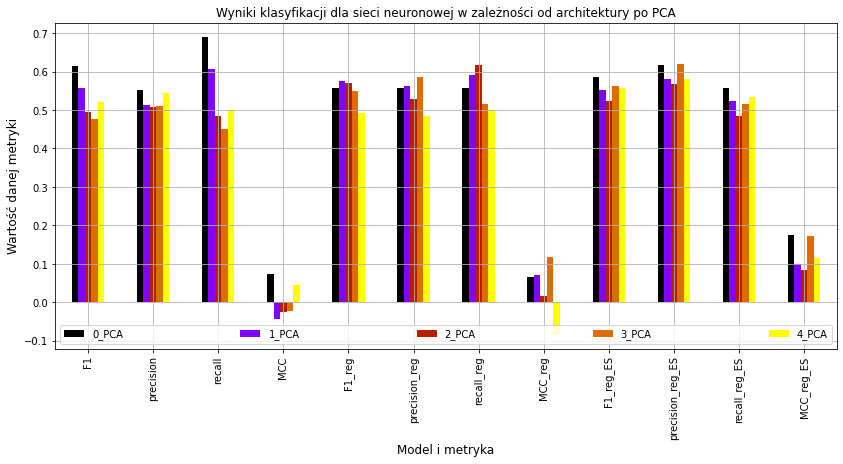

In [ ]:
ax = results_NN_PCA_all.plot(kind='bar', figsize=(14, 6), legend=True, colormap='gnuplot')
ax.set_xlabel("Model i metryka", fontsize=12)
ax.set_ylabel("Wartość danej metryki", fontsize=12)
plt.legend(loc="lower left", mode = "expand", ncol = 5)
plt.title("Wyniki klasyfikacji dla sieci neuronowej w zależności od architektury po PCA")
plt.grid()
plt.show()

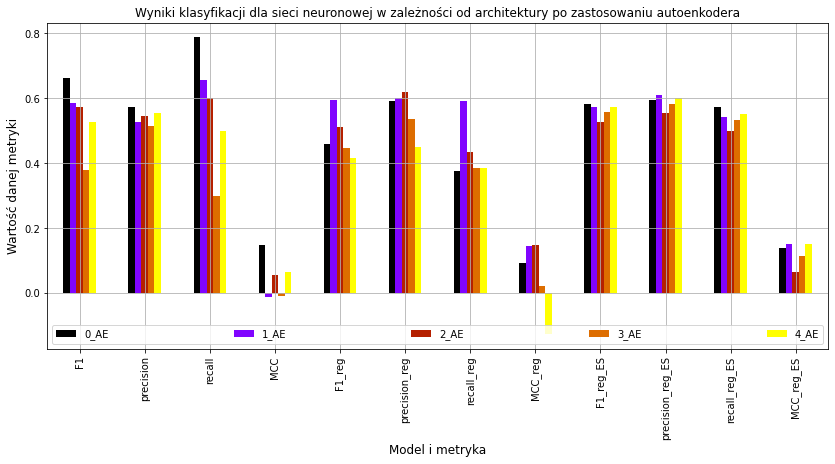

In [ ]:
ax = results_NN_AE_all.plot(kind='bar', figsize=(14, 6), legend=True, colormap='gnuplot')
ax.set_xlabel("Model i metryka", fontsize=12)
ax.set_ylabel("Wartość danej metryki", fontsize=12)
plt.legend(loc="lower left", mode = "expand", ncol = 5)
plt.title("Wyniki klasyfikacji dla sieci neuronowej w zależności od architektury po zastosowaniu autoenkodera")
plt.grid()
plt.show()

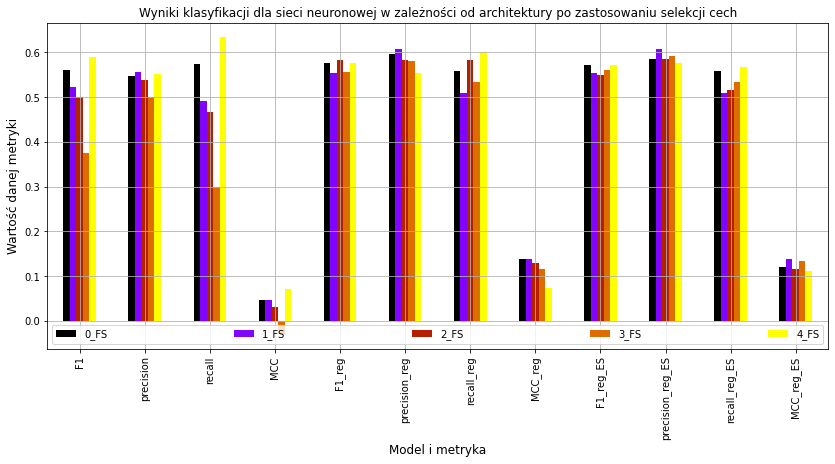

In [ ]:
ax = results_NN_FS_all.plot(kind='bar', figsize=(14, 6), legend=True, colormap='gnuplot')
ax.set_xlabel("Model i metryka", fontsize=12)
ax.set_ylabel("Wartość danej metryki", fontsize=12)
plt.legend(loc="lower left", mode = "expand", ncol = 5)
plt.title("Wyniki klasyfikacji dla sieci neuronowej w zależności od architektury po zastosowaniu selekcji cech")
plt.grid()
plt.show()

**zapisanie wynikow na dysk**

In [ ]:
from google.colab import  drive

drive.mount('/drive')

results_df_NN_PCA_normal.to_csv('/drive/MyDrive/classification/results/results_df_NN_PCA_normal.csv')
results_df_NN_AE_normal.to_csv('/drive/MyDrive/classification/results/results_df_NN_AE_normal.csv')
results_df_NN_FS_normal.to_csv('/drive/MyDrive/classification/results/results_df_NN_FS_normal.csv')

results_df_NN_PCA_normal_reg.to_csv('/drive/MyDrive/classification/results/results_df_NN_PCA_normal_reg.csv')
results_df_NN_AE_normal_reg.to_csv('/drive/MyDrive/classification/results/results_df_NN_AE_normal_reg.csv')
results_df_NN_FS_normal_reg.to_csv('/drive/MyDrive/classification/results/results_df_NN_FS_normal_reg.csv')

results_df_NN_PCA_normal_ES.to_csv('/drive/MyDrive/classification/results/results_df_NN_PCA_normal_ES.csv')
results_df_NN_AE_normal_ES.to_csv('/drive/MyDrive/classification/results/results_df_NN_AE_normal_ES.csv')
results_df_NN_FS_normal_ES.to_csv('/drive/MyDrive/classification/results/results_df_NN_FS_normal_ES.csv')

Mounted at /drive


In [ ]:
history_AE_normal = pd.DataFrame(history_AE_normal.history)
history_PCA_normal = pd.DataFrame(history_PCA_normal.history)
history_FS_normal= pd.DataFrame(history_FS_normal.history)

history_AE_normal_reg= pd.DataFrame(history_AE_normal_reg.history)
history_PCA_normal_reg= pd.DataFrame(history_PCA_normal_reg.history)
history_FS_normal_reg= pd.DataFrame(history_FS_normal_reg.history)

history_AE_normal_ES= pd.DataFrame(history_AE_normal_ES.history)
history_PCA_normal_ES= pd.DataFrame(history_PCA_normal_ES.history)
history_FS_normal_ES= pd.DataFrame(history_FS_normal_ES.history)

history_AE_normal.to_csv('/drive/MyDrive/classification/results/history_AE_normal.csv')
history_PCA_normal.to_csv('/drive/MyDrive/classification/results/history_PCA_normal.csv')
history_FS_normal.to_csv('/drive/MyDrive/classification/results/history_FS_normal.csv')

history_AE_normal_reg.to_csv('/drive/MyDrive/classification/results/history_AE_normal_reg.csv')
history_PCA_normal_reg.to_csv('/drive/MyDrive/classification/results/history_PCA_normal_reg.csv')
history_FS_normal_reg.to_csv('/drive/MyDrive/classification/results/history_FS_normal_reg.csv')

history_AE_normal_ES.to_csv('/drive/MyDrive/classification/results/history_AE_normal_ES.csv')
history_PCA_normal_ES.to_csv('/drive/MyDrive/classification/results/history_PCA_normal_ES.csv')
history_FS_normal_ES.to_csv('/drive/MyDrive/classification/results/history_FS_normal_ES.csv')

In [ ]:
drive.mount('/drive')
mean_NN_srednie_reg_ES= pd.read_csv('/drive/MyDrive/classification/results/srednie_NN_reg_ES.csv', sep=';')
mean_NN_srednie_reg_ES.columns = mean_NN_srednie_reg_ES.iloc[0]
mean_NN_srednie_reg_ES.drop([0], axis=0, inplace=True)
mean_NN_srednie_reg_ES.index = mean_NN_srednie_reg_ES['Model+metryka']
mean_NN_srednie_reg_ES.drop(columns='Model+metryka', axis=1, inplace=True)
mean_NN_srednie_reg_ES = mean_NN_srednie_reg_ES.astype(float)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


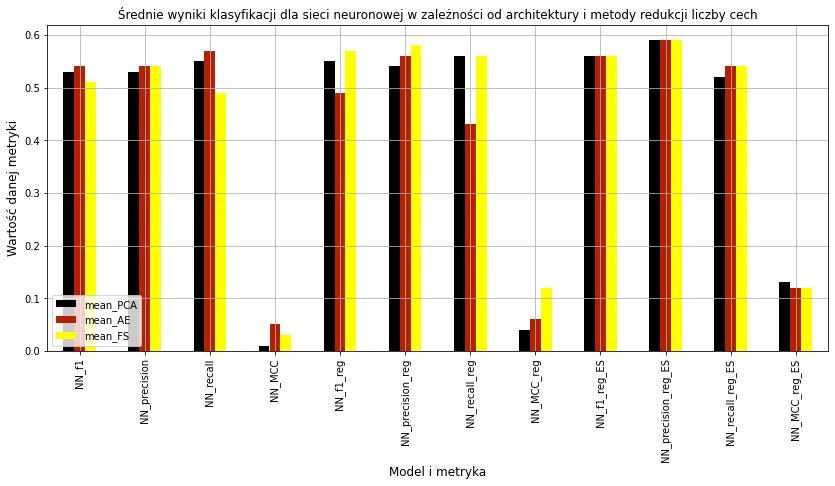

In [ ]:
ax = mean_NN_srednie_reg_ES.plot(kind='bar', figsize=(14, 6), legend=True, colormap='gnuplot')
ax.set_xlabel("Model i metryka", fontsize=12)
ax.set_ylabel("Wartość danej metryki", fontsize=12)
plt.legend(loc="lower left")
plt.title("Średnie wyniki klasyfikacji dla sieci neuronowej w zależności od architektury i metody redukcji liczby cech")
plt.grid()
plt.show()